In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices/sample_submission.csv
/kaggle/input/house-prices/train.csv
/kaggle/input/house-prices/test.csv



# İş Problemi:

# Her bir eve ait özelliklerin ve ev fiyatlarının bulunduğu bir veri seti kullanılarak, farklı tipteki evlerin fiyatları ile ilgili bir makine öğrenmesi projesi gerçekleştirilmek istenmektedir.


# 1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action="ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# 2. Adjusting Row Column Settings

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
sample = pd.read_csv("/kaggle/input/house-prices/sample_submission.csv")


In [6]:
train = pd.read_csv("/kaggle/input/house-prices/train.csv")

In [7]:
test =pd.read_csv("/kaggle/input/house-prices/test.csv")


# Görev 1: Keşifçi Veri Analizi 

# Adım 1: Train ve test veri setlerini okuyup birleştiriniz. Analizlerinizi birleştirdiğiniz veri üzerinde yapınız.


In [8]:
df = pd.concat([train,test], ignore_index=True)

In [9]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
train.shape

(1460, 81)

In [11]:
train.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count   1460.000      1460.000    1452.000    1460.000    1460.000   1460.000   
mean    1971.268      1984.866     103.685     443.640      46.549    567.240   
std       30.203        20.645     181.066     456.098     161.319    441.867   
min     1872.000      1950.000       0.000       0.000       0.000      0.000   
25%     1954.000      1967.000       0.000       0.000       0.000    223.000   
50%     1973.000      1994.000       0.000     383.500       0.000    477.500   
75%     2000.000      2004.000     166.000     712.250       0.000    808.000   
max     2010.000      2010.000    1600.000    5644.000    1474.000   2336.000   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000   
mean      1057.429  1162.627   346.992         5.845   1515.464         0.425   
std        438.705   386.588   436.528        48.623    525.480         0.519   
min          0.000   334.000     0.000         0.000    334.000         0.000   
25%        795.750   882.000     0.000         0.000   1129.500         0.000   
50%        991.500  1087.000     0.000         0.000   1464.000         0.000   
75%       1298.250  1391.250   728.000         0.000   1776.750         1.000   
max       6110.000  4692.000  2065.000       572.000   5642.000         3.000   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count      1460.000  1460.000  1460.000      1460.000      1460.000   
mean          0.058     1.565     0.383         2.866         1.047   
std           0.239     0.551     0.503         0.816         0.220   
min           0.000     0.000     0.000         0.000         0.000   
25%           0.000     1.000     0.000         2.000         1.000   
50%           0.000     2.000     0.000         3.000         1.000   
75%           0.000     2.000     1.000         3.000         1.000   
max           2.000     3.000     2.000         8.000         3.000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count      1460.000    1460.000     1379.000    1460.000    1460.000   
mean          6.518       0.613     1978.506       1.767     472.980   
std           1.625       0.645       24.690       0.747     213.805   
min           2.000       0.000     1900.000       0.000       0.000   
25%           5.000       0.000     1961.000       1.000     334.500   
50%           6.000       1.000     1980.000       2.000     480.000   
75%           7.000       1.000     2002.000       2.000     576.000   
max          14.000       3.000     2010.000       4.000    1418.000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count    1460.000     1460.000       1460.000   1460.000     1460.000   
mean       94.245       46.660         21.954      3.410       15.061   
std       125.339       66.256         61.119     29.317       55.757   
min         0.000        0.000          0.000      0.000        0.000   
25%         0.000        0.000          0.000      0.000        0.000   
50%         0.000       25.000          0.000      0.000        0.000   
75%       168.000       68.000 

In [12]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [13]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [14]:
test.shape

(1459, 80)

#  Exploratory Data Analysis

In [15]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub

# Numerik ve kategorik değişkenleri yakalayınız.

In [16]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [17]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [18]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

In [19]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [20]:
cat_but_car

['Neighborhood']

In [21]:
num_but_cat

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

# Adım 3: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

In [22]:
for col in df.columns:
    if df[col].dtype == 'int64' and df[col].nunique() < 20:
        print(f"Muhtemelen kategorik: {col} - Benzersiz değer sayısı: {df[col].nunique()}")



Muhtemelen kategorik: MSSubClass - Benzersiz değer sayısı: 16
Muhtemelen kategorik: OverallQual - Benzersiz değer sayısı: 10
Muhtemelen kategorik: OverallCond - Benzersiz değer sayısı: 9
Muhtemelen kategorik: FullBath - Benzersiz değer sayısı: 5
Muhtemelen kategorik: HalfBath - Benzersiz değer sayısı: 3
Muhtemelen kategorik: BedroomAbvGr - Benzersiz değer sayısı: 8
Muhtemelen kategorik: KitchenAbvGr - Benzersiz değer sayısı: 4
Muhtemelen kategorik: TotRmsAbvGrd - Benzersiz değer sayısı: 14
Muhtemelen kategorik: Fireplaces - Benzersiz değer sayısı: 5
Muhtemelen kategorik: PoolArea - Benzersiz değer sayısı: 14
Muhtemelen kategorik: MoSold - Benzersiz değer sayısı: 12
Muhtemelen kategorik: YrSold - Benzersiz değer sayısı: 5


In [23]:

categorical_candidates = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
                          'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                          'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea',
                          'MoSold', 'YrSold']

for col in categorical_candidates:
    df[col] = df[col].astype("category")


In [24]:
df[categorical_candidates].dtypes


OverallQual     category
OverallCond     category
BsmtFullBath    category
BsmtHalfBath    category
FullBath        category
HalfBath        category
BedroomAbvGr    category
KitchenAbvGr    category
TotRmsAbvGrd    category
Fireplaces      category
GarageCars      category
PoolArea        category
MoSold          category
YrSold          category
dtype: object

#  Analysis of Categorical Variables

In [25]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856
##########################################


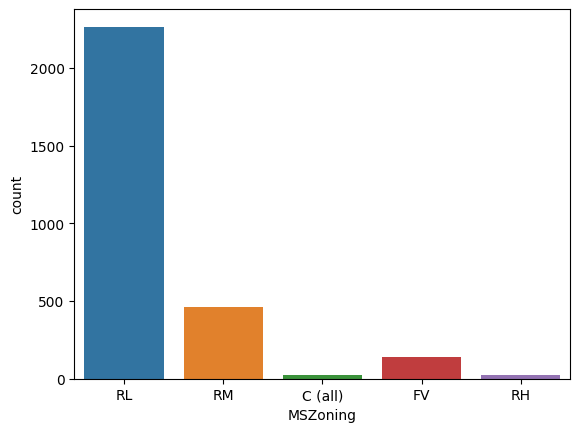

        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411
##########################################


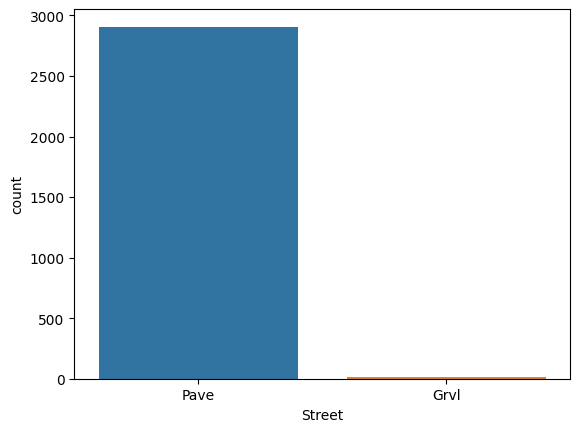

       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672
##########################################


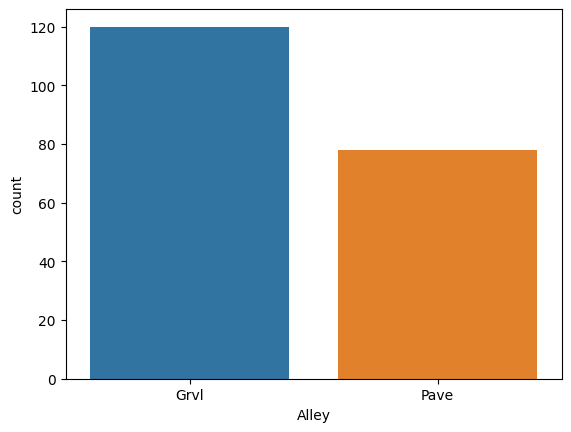

          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548
##########################################


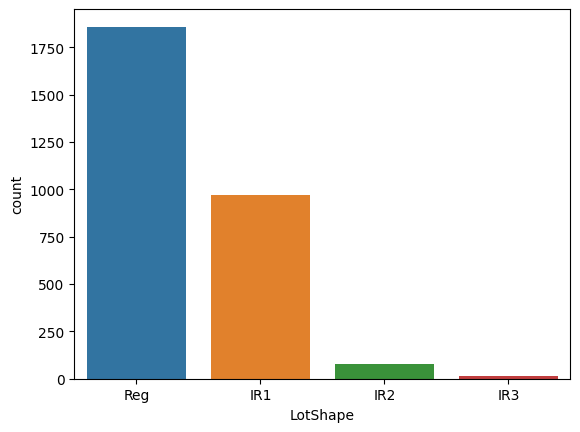

             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055
##########################################


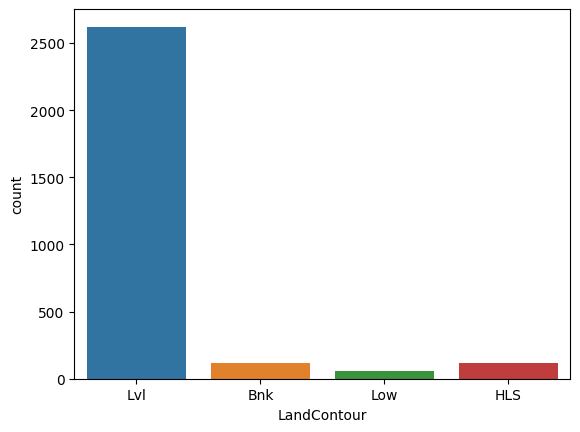

           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034
##########################################


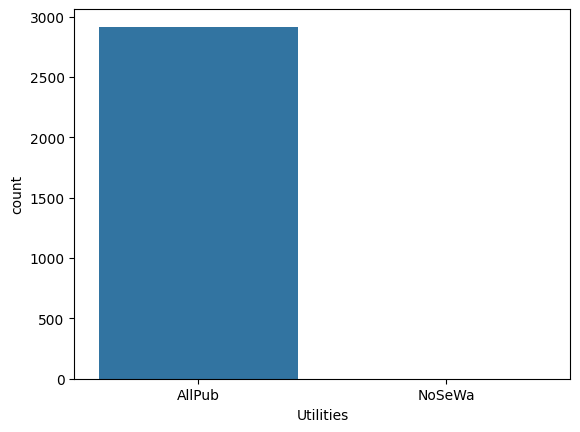

           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  0.480
##########################################


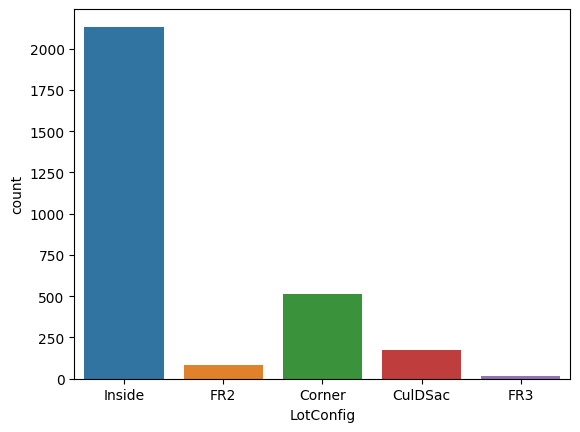

           LandSlope  Ratio
LandSlope                  
Gtl             2778 95.170
Mod              125  4.282
Sev               16  0.548
##########################################


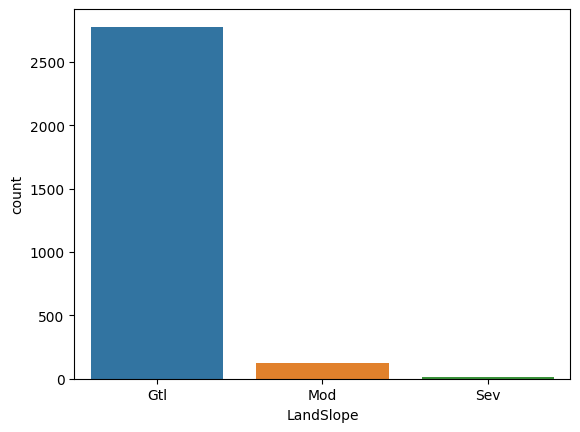

            Condition1  Ratio
Condition1                   
Norm              2511 86.023
Feedr              164  5.618
Artery              92  3.152
RRAn                50  1.713
PosN                39  1.336
RRAe                28  0.959
PosA                20  0.685
RRNn                 9  0.308
RRNe                 6  0.206
##########################################


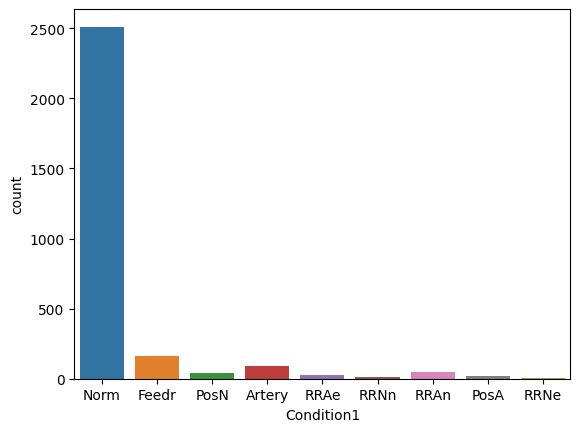

            Condition2  Ratio
Condition2                   
Norm              2889 98.972
Feedr               13  0.445
Artery               5  0.171
PosN                 4  0.137
PosA                 4  0.137
RRNn                 2  0.069
RRAn                 1  0.034
RRAe                 1  0.034
##########################################


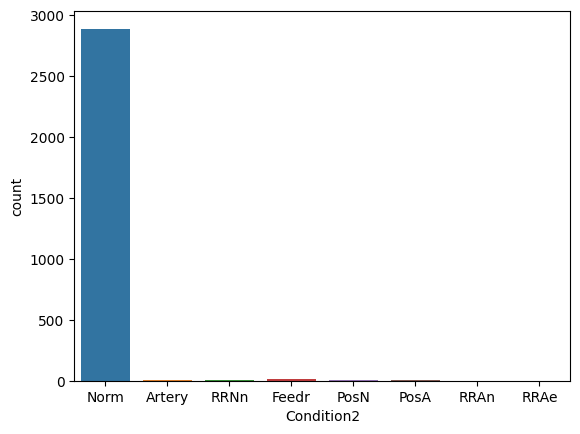

          BldgType  Ratio
BldgType                 
1Fam          2425 83.076
TwnhsE         227  7.777
Duplex         109  3.734
Twnhs           96  3.289
2fmCon          62  2.124
##########################################


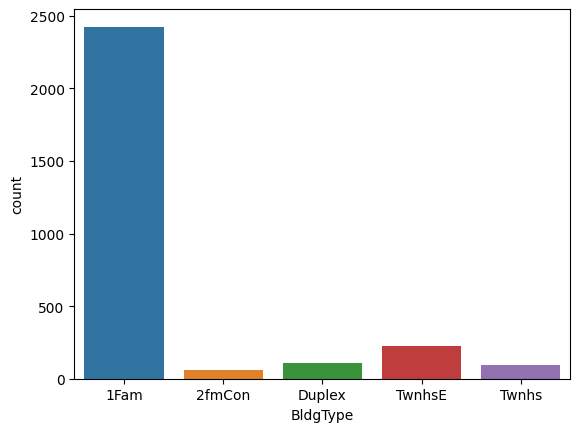

            HouseStyle  Ratio
HouseStyle                   
1Story            1471 50.394
2Story             872 29.873
1.5Fin             314 10.757
SLvl               128  4.385
SFoyer              83  2.843
2.5Unf              24  0.822
1.5Unf              19  0.651
2.5Fin               8  0.274
##########################################


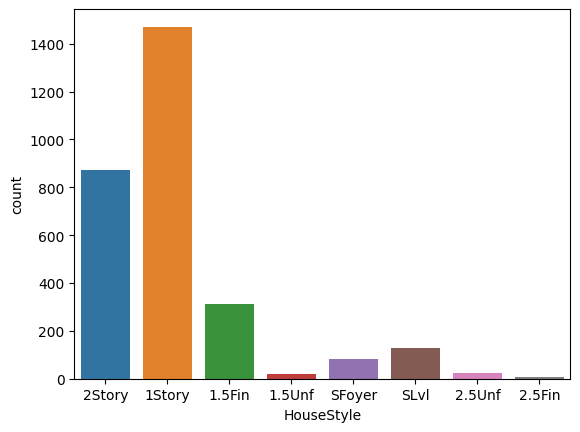

           RoofStyle  Ratio
RoofStyle                  
Gable           2310 79.137
Hip              551 18.876
Gambrel           22  0.754
Flat              20  0.685
Mansard           11  0.377
Shed               5  0.171
##########################################


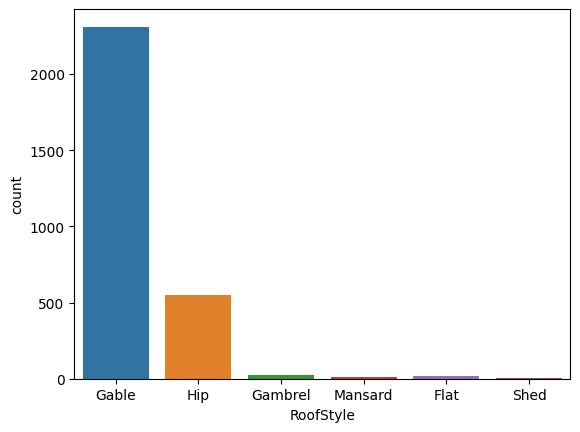

          RoofMatl  Ratio
RoofMatl                 
CompShg       2876 98.527
Tar&Grv         23  0.788
WdShake          9  0.308
WdShngl          7  0.240
Metal            1  0.034
Membran          1  0.034
Roll             1  0.034
ClyTile          1  0.034
##########################################


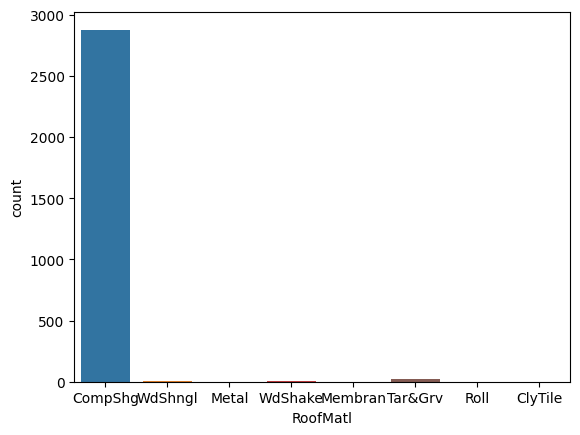

             Exterior1st  Ratio
Exterior1st                    
VinylSd             1025 35.115
MetalSd              450 15.416
HdBoard              442 15.142
Wd Sdng              411 14.080
Plywood              221  7.571
CemntBd              126  4.317
BrkFace               87  2.980
WdShing               56  1.918
AsbShng               44  1.507
Stucco                43  1.473
BrkComm                6  0.206
AsphShn                2  0.069
Stone                  2  0.069
CBlock                 2  0.069
ImStucc                1  0.034
##########################################


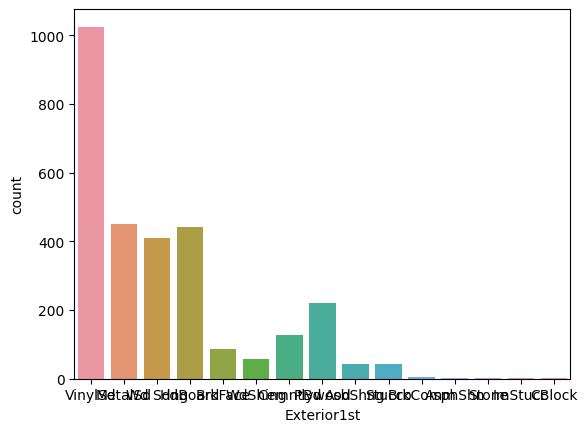

             Exterior2nd  Ratio
Exterior2nd                    
VinylSd             1014 34.738
MetalSd              447 15.313
HdBoard              406 13.909
Wd Sdng              391 13.395
Plywood              270  9.250
CmentBd              126  4.317
Wd Shng               81  2.775
BrkFace               47  1.610
Stucco                47  1.610
AsbShng               38  1.302
Brk Cmn               22  0.754
ImStucc               15  0.514
Stone                  6  0.206
AsphShn                4  0.137
CBlock                 3  0.103
Other                  1  0.034
##########################################


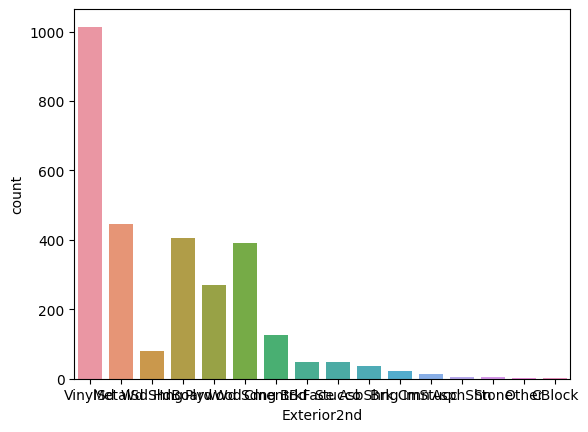

            MasVnrType  Ratio
MasVnrType                   
BrkFace            879 30.113
Stone              249  8.530
BrkCmn              25  0.856
##########################################


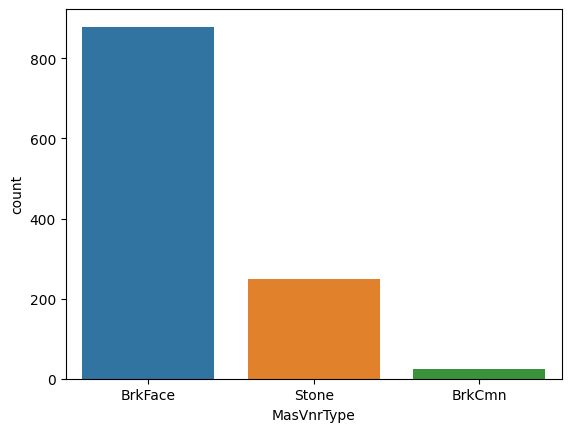

           ExterQual  Ratio
ExterQual                  
TA              1798 61.596
Gd               979 33.539
Ex               107  3.666
Fa                35  1.199
##########################################


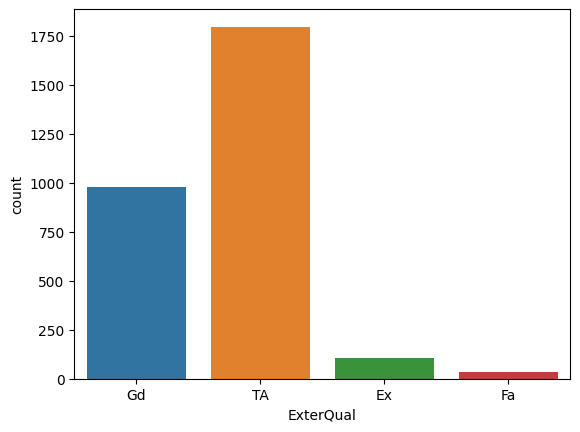

           ExterCond  Ratio
ExterCond                  
TA              2538 86.948
Gd               299 10.243
Fa                67  2.295
Ex                12  0.411
Po                 3  0.103
##########################################


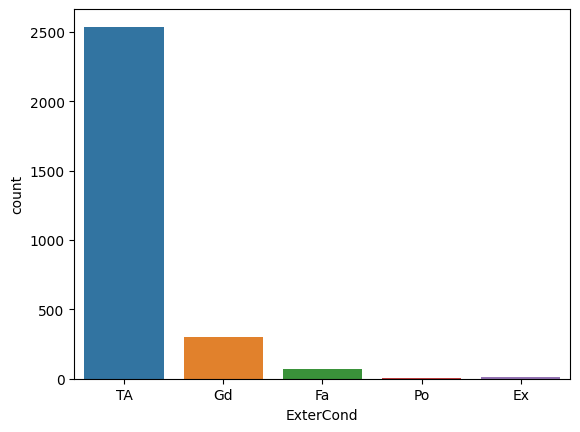

            Foundation  Ratio
Foundation                   
PConc             1308 44.810
CBlock            1235 42.309
BrkTil             311 10.654
Slab                49  1.679
Stone               11  0.377
Wood                 5  0.171
##########################################


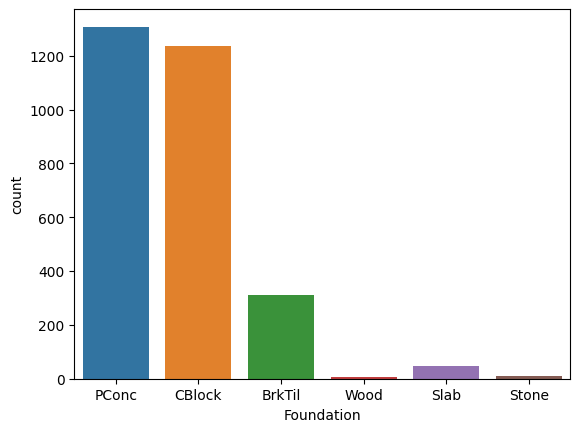

          BsmtQual  Ratio
BsmtQual                 
TA            1283 43.953
Gd            1209 41.418
Ex             258  8.839
Fa              88  3.015
##########################################


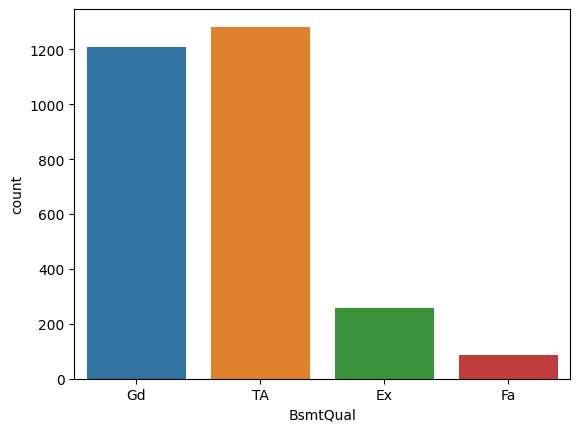

          BsmtCond  Ratio
BsmtCond                 
TA            2606 89.277
Gd             122  4.180
Fa             104  3.563
Po               5  0.171
##########################################


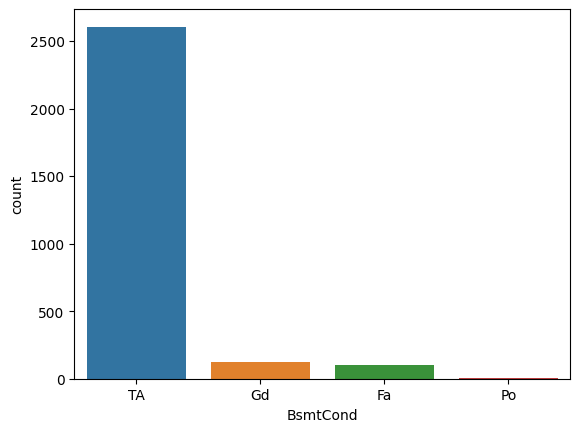

              BsmtExposure  Ratio
BsmtExposure                     
No                    1904 65.228
Av                     418 14.320
Gd                     276  9.455
Mn                     239  8.188
##########################################


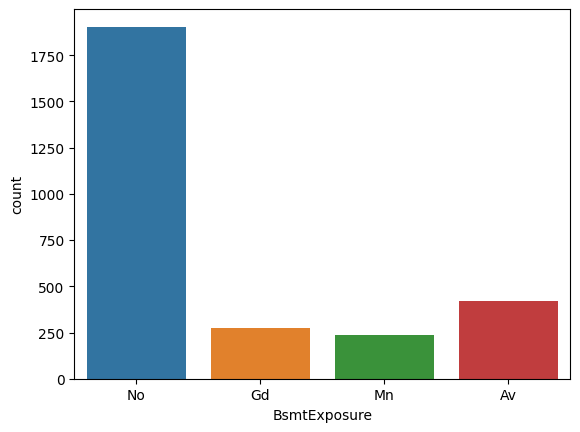

              BsmtFinType1  Ratio
BsmtFinType1                     
Unf                    851 29.154
GLQ                    849 29.085
ALQ                    429 14.697
Rec                    288  9.866
BLQ                    269  9.215
LwQ                    154  5.276
##########################################


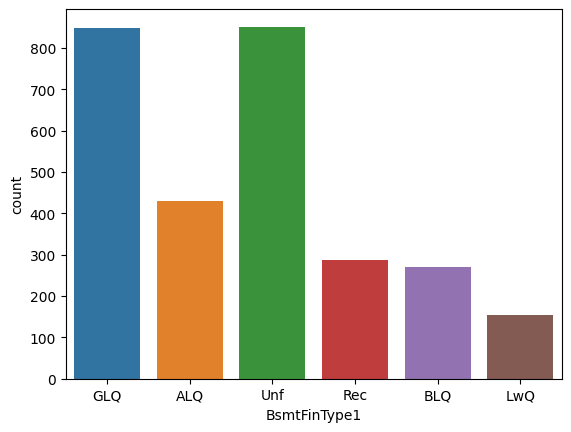

              BsmtFinType2  Ratio
BsmtFinType2                     
Unf                   2493 85.406
Rec                    105  3.597
LwQ                     87  2.980
BLQ                     68  2.330
ALQ                     52  1.781
GLQ                     34  1.165
##########################################


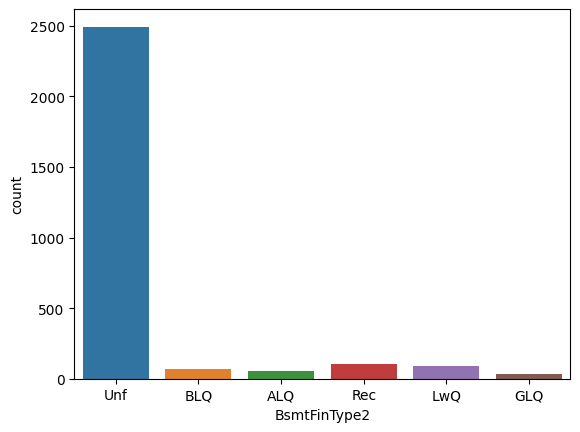

         Heating  Ratio
Heating                
GasA        2874 98.458
GasW          27  0.925
Grav           9  0.308
Wall           6  0.206
OthW           2  0.069
Floor          1  0.034
##########################################


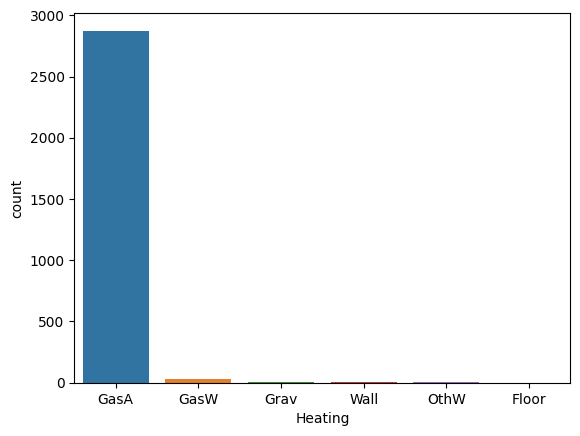

           HeatingQC  Ratio
HeatingQC                  
Ex              1493 51.148
TA               857 29.359
Gd               474 16.238
Fa                92  3.152
Po                 3  0.103
##########################################


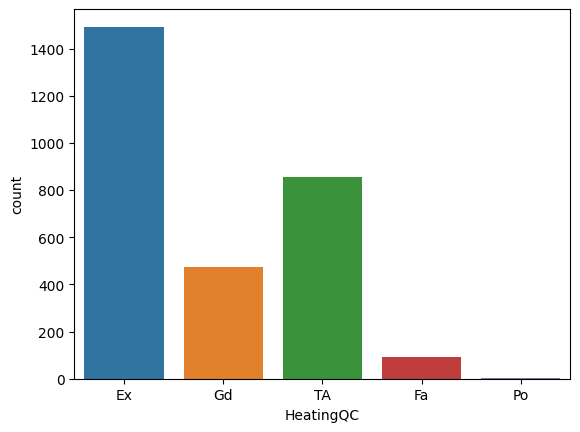

            CentralAir  Ratio
CentralAir                   
Y                 2723 93.285
N                  196  6.715
##########################################


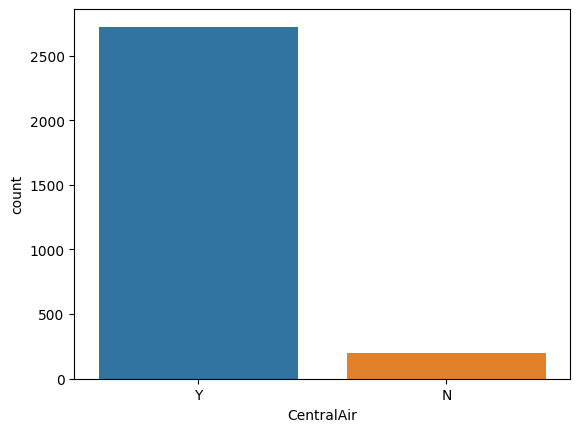

            Electrical  Ratio
Electrical                   
SBrkr             2671 91.504
FuseA              188  6.441
FuseF               50  1.713
FuseP                8  0.274
Mix                  1  0.034
##########################################


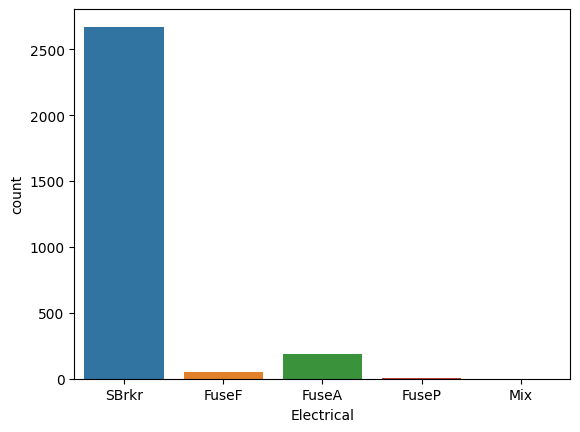

             KitchenQual  Ratio
KitchenQual                    
TA                  1492 51.113
Gd                  1151 39.431
Ex                   205  7.023
Fa                    70  2.398
##########################################


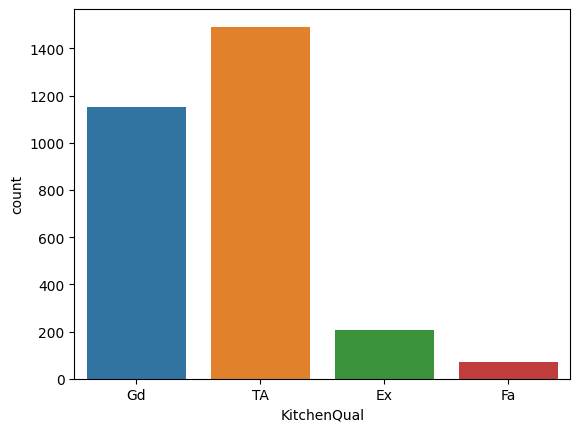

            Functional  Ratio
Functional                   
Typ               2717 93.080
Min2                70  2.398
Min1                65  2.227
Mod                 35  1.199
Maj1                19  0.651
Maj2                 9  0.308
Sev                  2  0.069
##########################################


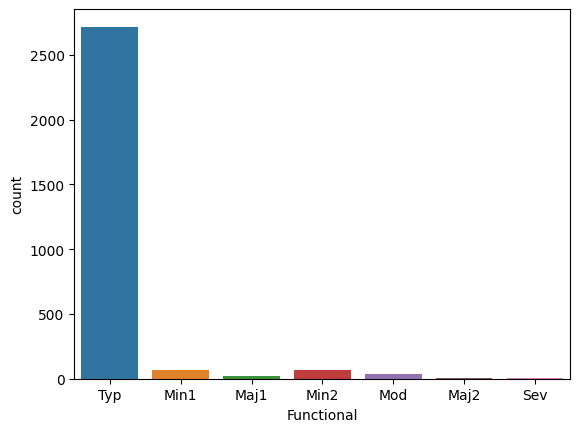

             FireplaceQu  Ratio
FireplaceQu                    
Gd                   744 25.488
TA                   592 20.281
Fa                    74  2.535
Po                    46  1.576
Ex                    43  1.473
##########################################


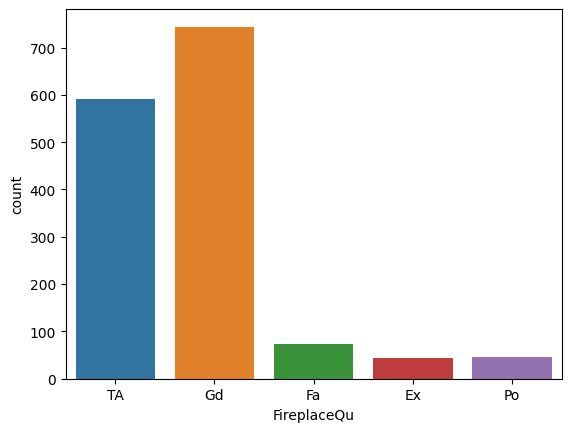

            GarageType  Ratio
GarageType                   
Attchd            1723 59.027
Detchd             779 26.687
BuiltIn            186  6.372
Basment             36  1.233
2Types              23  0.788
CarPort             15  0.514
##########################################


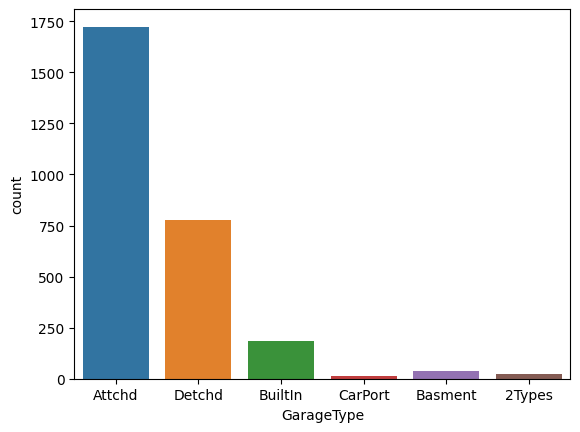

              GarageFinish  Ratio
GarageFinish                     
Unf                   1230 42.138
RFn                    811 27.783
Fin                    719 24.632
##########################################


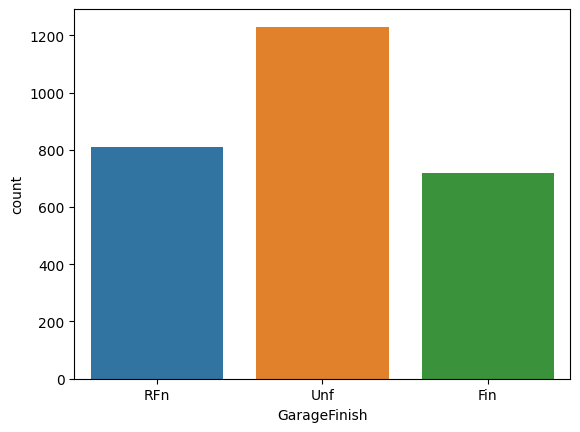

            GarageQual  Ratio
GarageQual                   
TA                2604 89.209
Fa                 124  4.248
Gd                  24  0.822
Po                   5  0.171
Ex                   3  0.103
##########################################


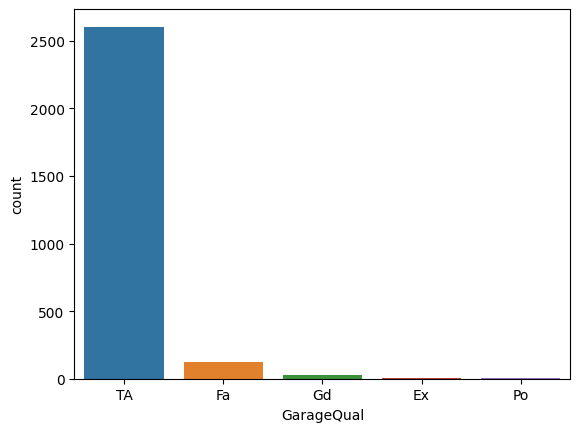

            GarageCond  Ratio
GarageCond                   
TA                2654 90.922
Fa                  74  2.535
Gd                  15  0.514
Po                  14  0.480
Ex                   3  0.103
##########################################


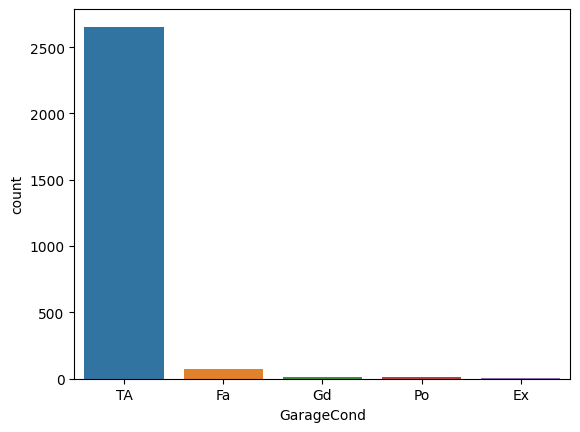

            PavedDrive  Ratio
PavedDrive                   
Y                 2641 90.476
N                  216  7.400
P                   62  2.124
##########################################


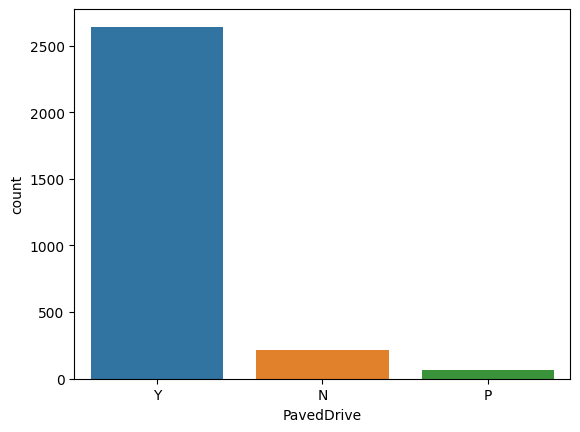

        PoolQC  Ratio
PoolQC               
Ex           4  0.137
Gd           4  0.137
Fa           2  0.069
##########################################


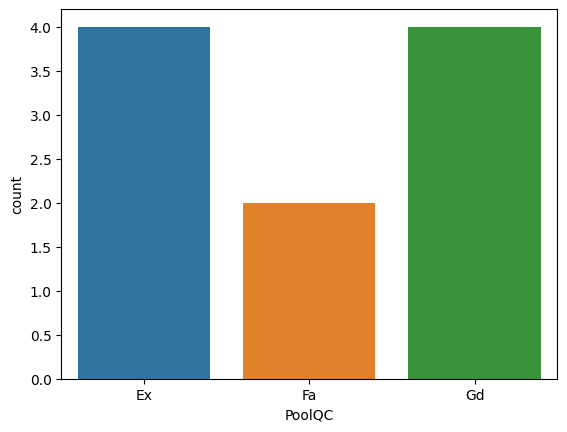

       Fence  Ratio
Fence              
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411
##########################################


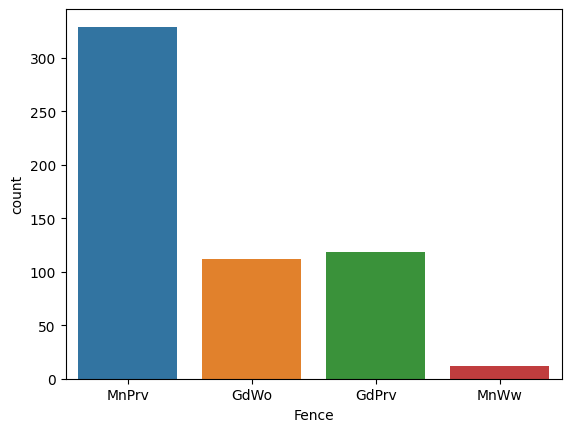

             MiscFeature  Ratio
MiscFeature                    
Shed                  95  3.255
Gar2                   5  0.171
Othr                   4  0.137
TenC                   1  0.034
##########################################


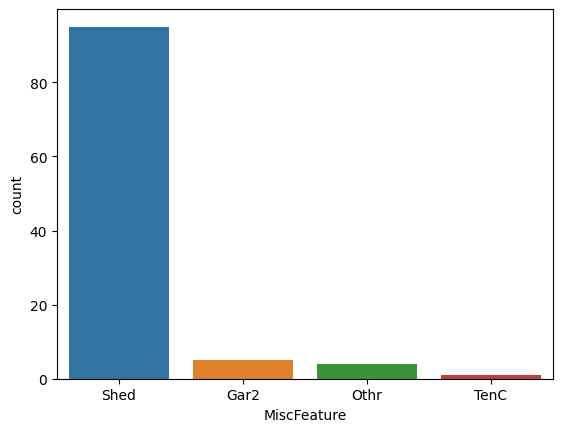

          SaleType  Ratio
SaleType                 
WD            2525 86.502
New            239  8.188
COD             87  2.980
ConLD           26  0.891
CWD             12  0.411
ConLI            9  0.308
ConLw            8  0.274
Oth              7  0.240
Con              5  0.171
##########################################


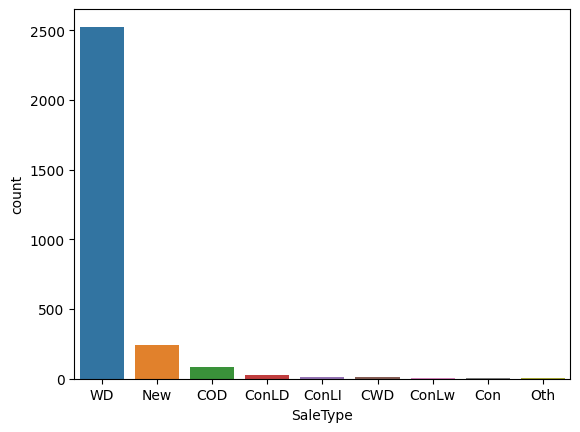

               SaleCondition  Ratio
SaleCondition                      
Normal                  2402 82.288
Partial                  245  8.393
Abnorml                  190  6.509
Family                    46  1.576
Alloca                    24  0.822
AdjLand                   12  0.411
##########################################


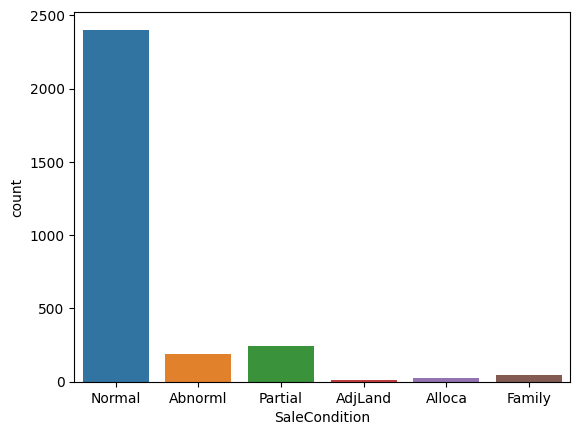

             OverallCond  Ratio
OverallCond                    
5                   1645 56.355
6                    531 18.191
7                    390 13.361
8                    144  4.933
4                    101  3.460
3                     50  1.713
9                     41  1.405
2                     10  0.343
1                      7  0.240
##########################################


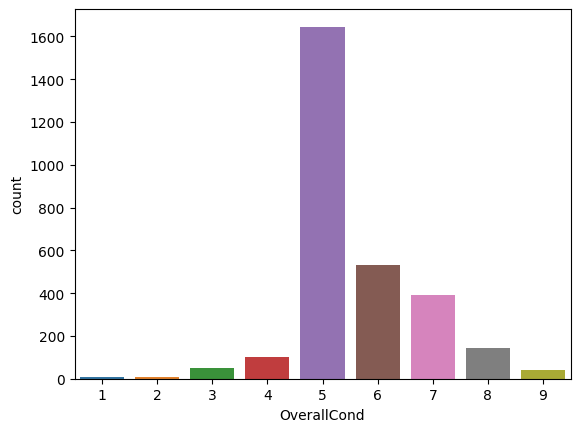

              BsmtFullBath  Ratio
BsmtFullBath                     
0.000                 1705 58.410
1.000                 1172 40.151
2.000                   38  1.302
3.000                    2  0.069
##########################################


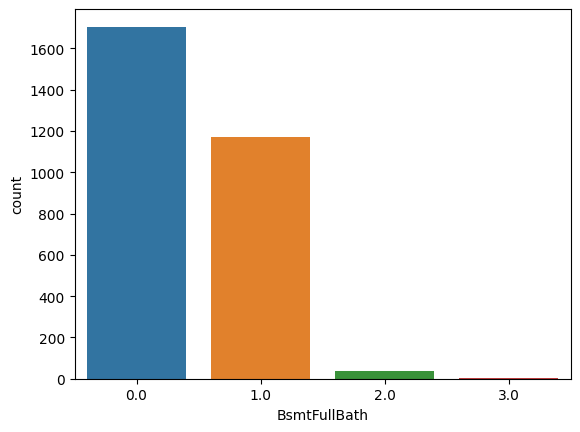

              BsmtHalfBath  Ratio
BsmtHalfBath                     
0.000                 2742 93.936
1.000                  171  5.858
2.000                    4  0.137
##########################################


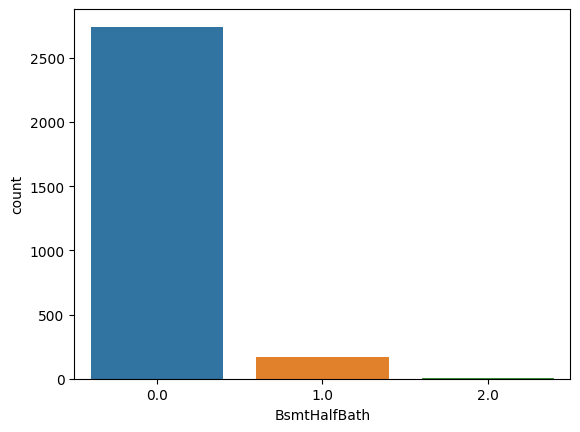

          FullBath  Ratio
FullBath                 
2             1530 52.415
1             1309 44.844
3               64  2.193
0               12  0.411
4                4  0.137
##########################################


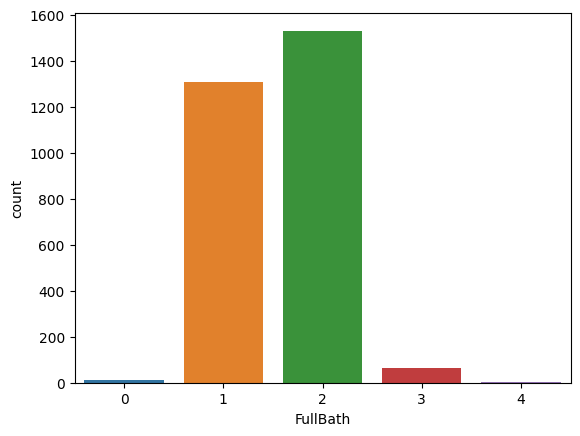

          HalfBath  Ratio
HalfBath                 
0             1834 62.830
1             1060 36.314
2               25  0.856
##########################################


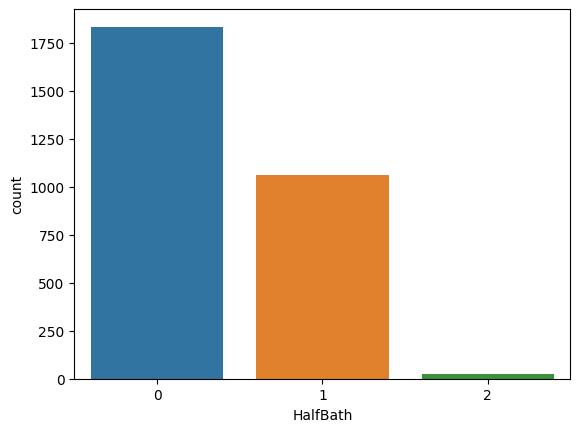

              BedroomAbvGr  Ratio
BedroomAbvGr                     
3                     1596 54.676
2                      742 25.420
4                      400 13.703
1                      103  3.529
5                       48  1.644
6                       21  0.719
0                        8  0.274
8                        1  0.034
##########################################


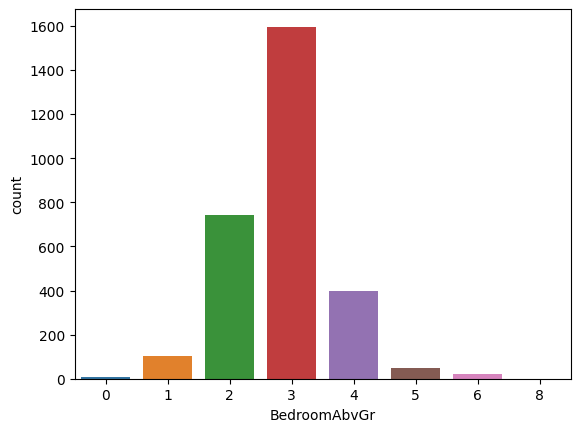

              KitchenAbvGr  Ratio
KitchenAbvGr                     
1                     2785 95.409
2                      129  4.419
0                        3  0.103
3                        2  0.069
##########################################


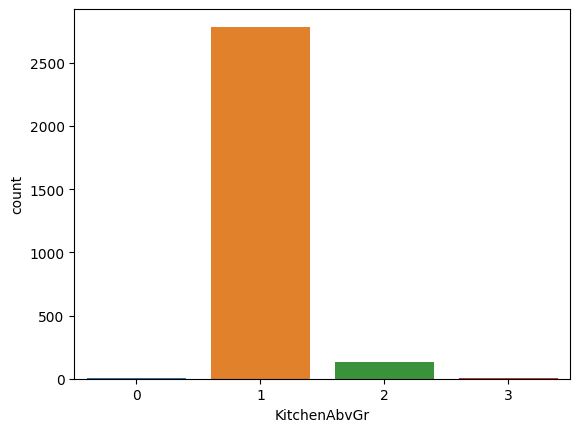

            Fireplaces  Ratio
Fireplaces                   
0                 1420 48.647
1                 1268 43.440
2                  219  7.503
3                   11  0.377
4                    1  0.034
##########################################


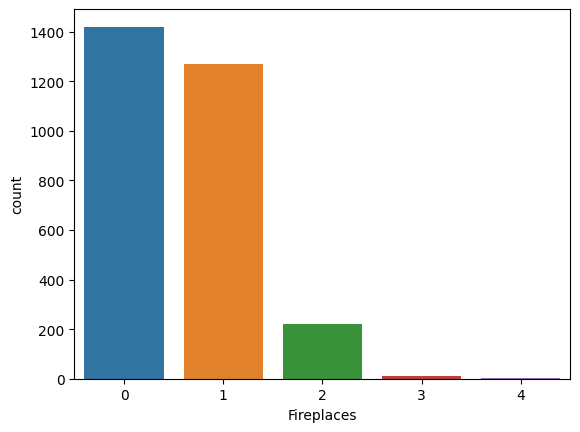

            GarageCars  Ratio
GarageCars                   
2.000             1594 54.608
1.000              776 26.584
3.000              374 12.813
0.000              157  5.379
4.000               16  0.548
5.000                1  0.034
##########################################


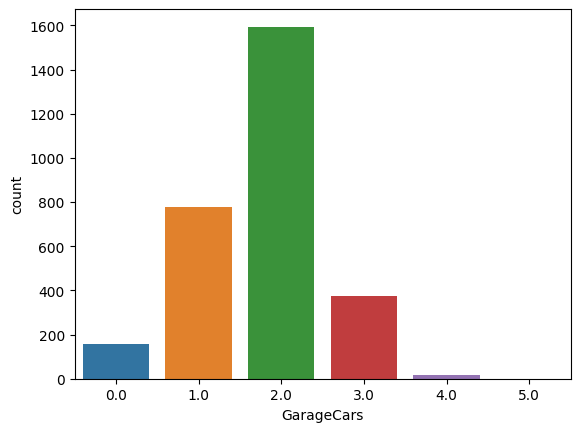

        YrSold  Ratio
YrSold               
2007       692 23.707
2009       647 22.165
2008       622 21.309
2006       619 21.206
2010       339 11.614
##########################################


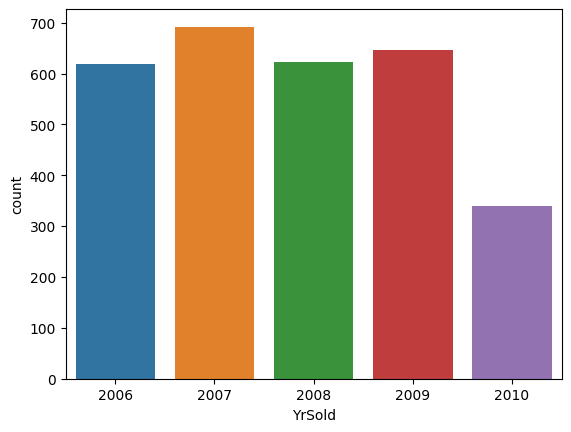

In [26]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

#  Analysis of Numerical Variables

In [27]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   2919.000
mean    1460.000
std      842.787
min        1.000
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
max     2919.000
Name: Id, dtype: float64


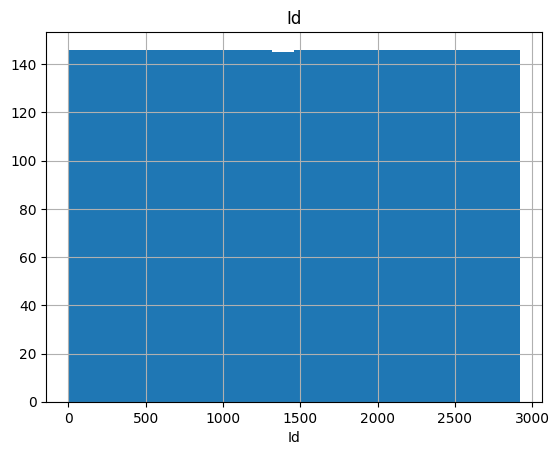

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


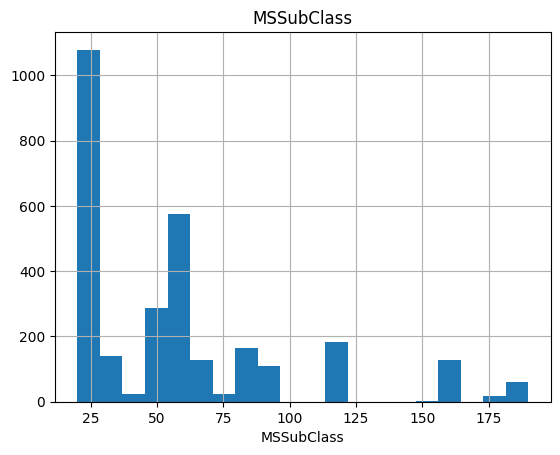

count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


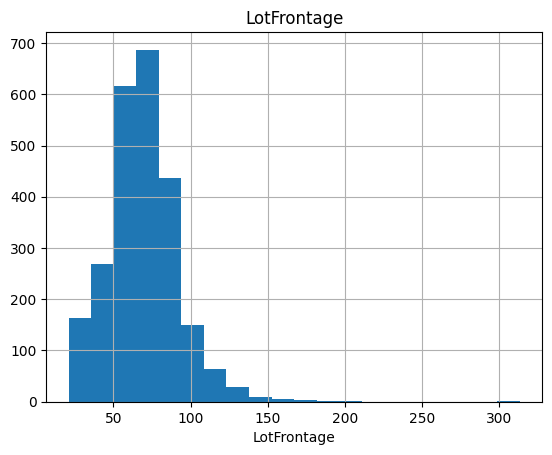

count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64


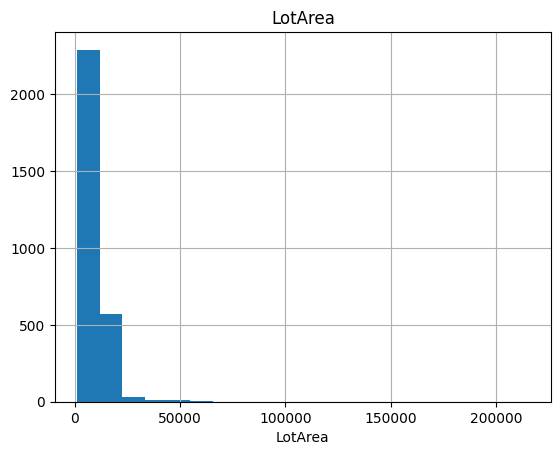

count     2919
unique      10
top          5
freq       825
Name: OverallQual, dtype: int64


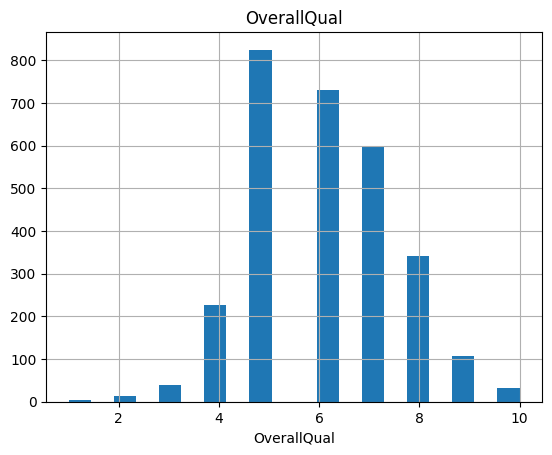

count   2919.000
mean    1971.313
std       30.291
min     1872.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
max     2010.000
Name: YearBuilt, dtype: float64


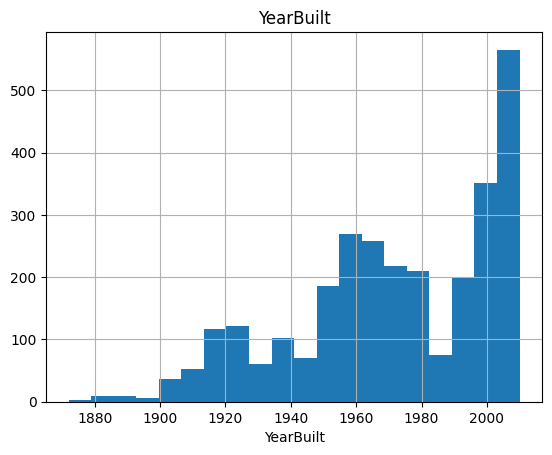

count   2919.000
mean    1984.264
std       20.894
min     1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


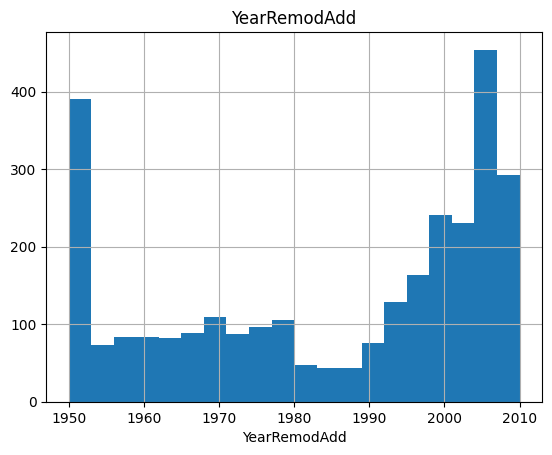

count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64


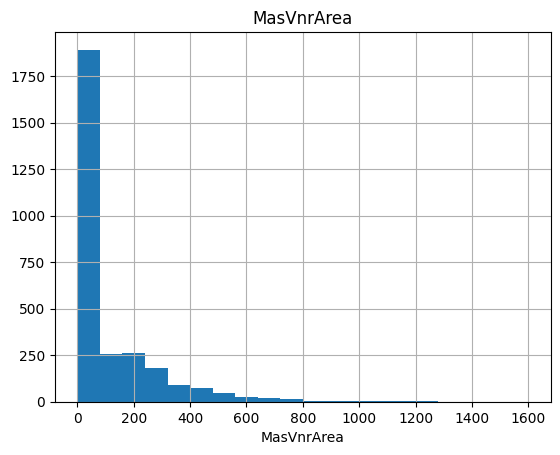

count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64


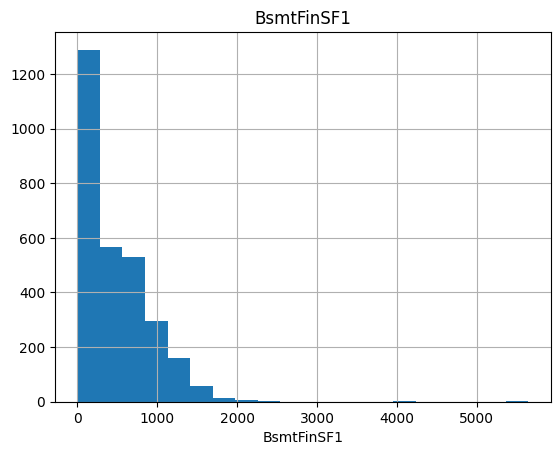

count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64


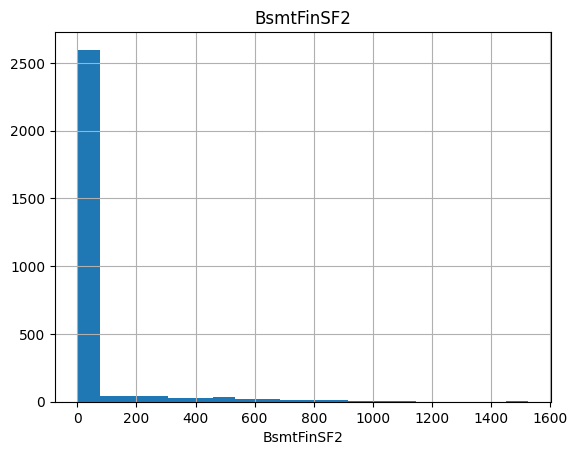

count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64


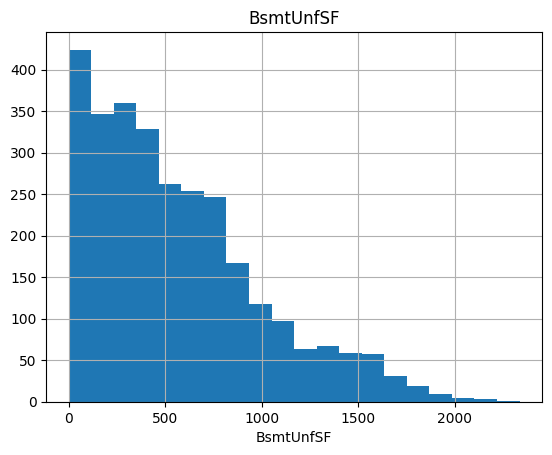

count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64


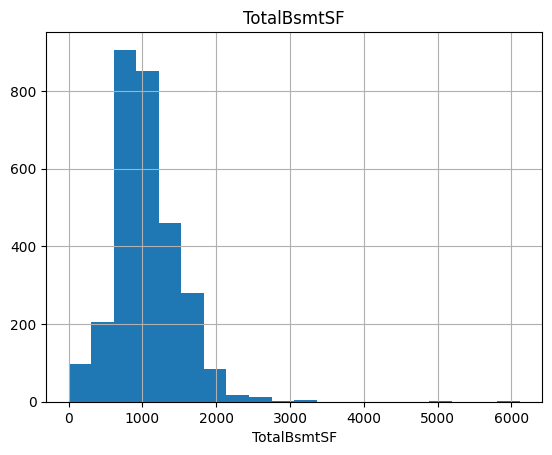

count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64


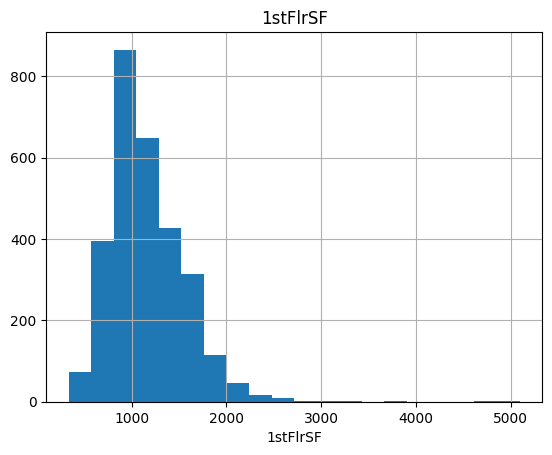

count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64


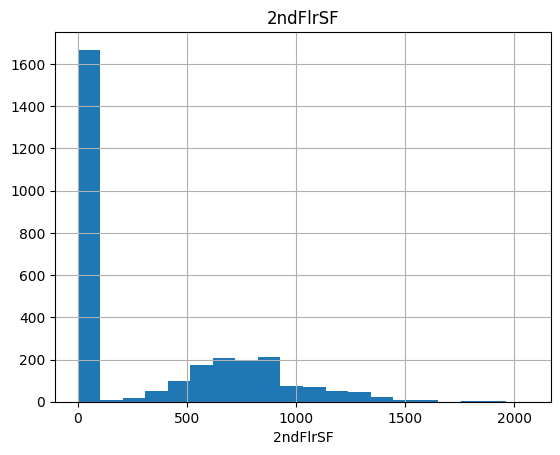

count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64


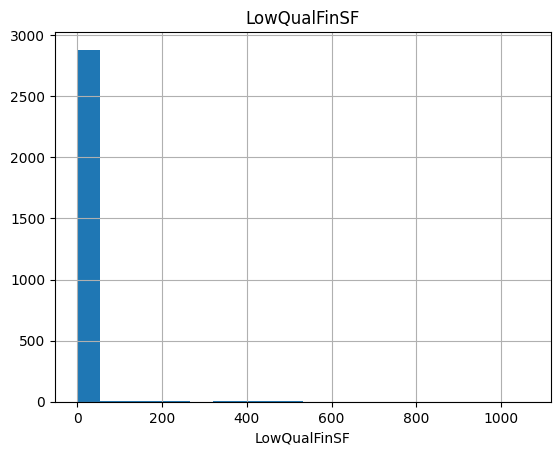

count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64


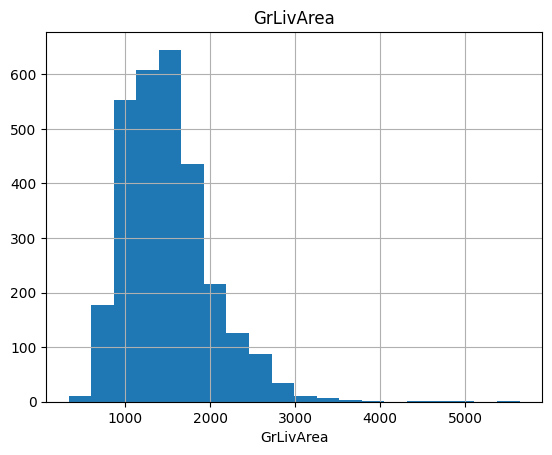

count     2919
unique      14
top          6
freq       844
Name: TotRmsAbvGrd, dtype: int64


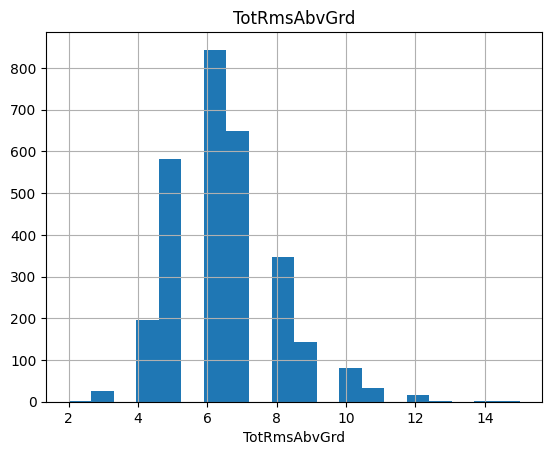

count   2760.000
mean    1978.113
std       25.574
min     1895.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2207.000
Name: GarageYrBlt, dtype: float64


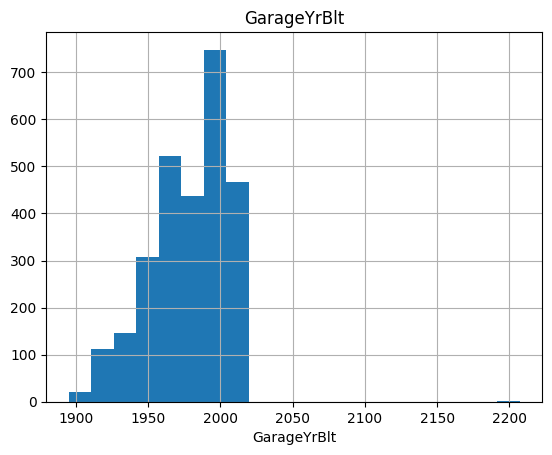

count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64


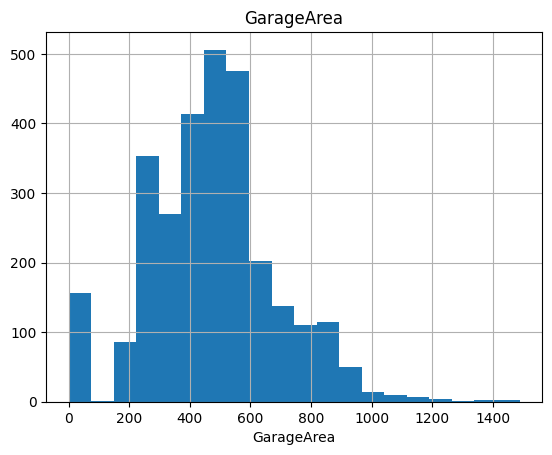

count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64


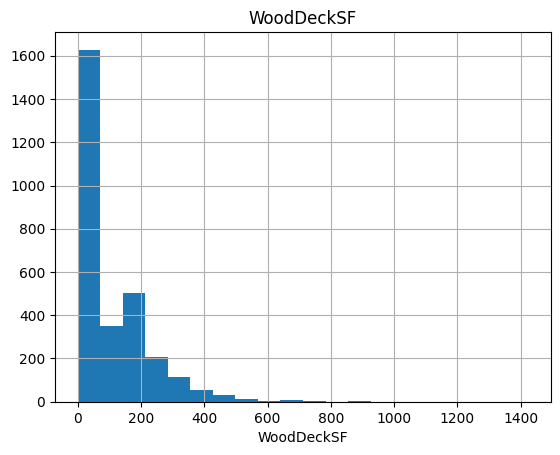

count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64


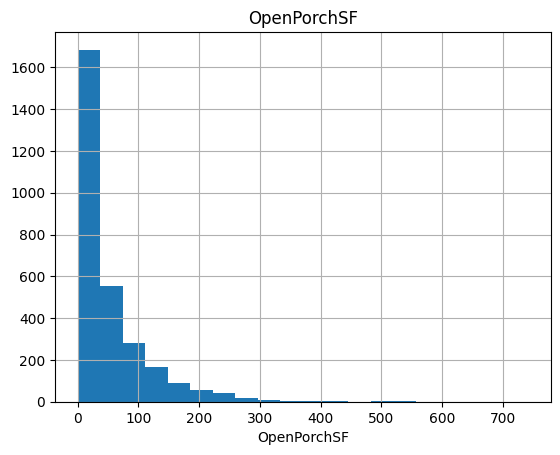

count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64


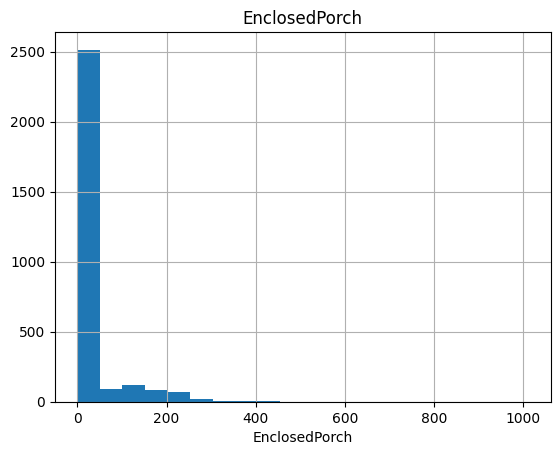

count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64


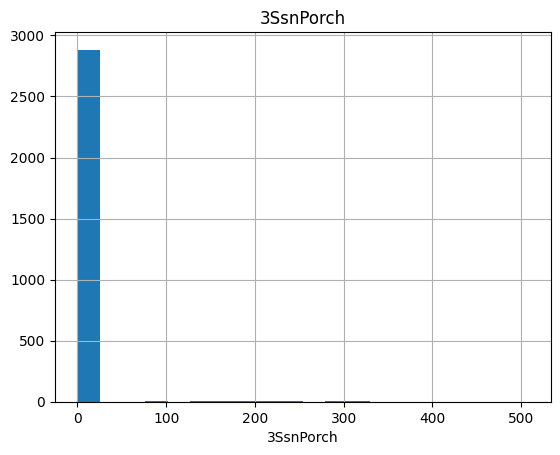

count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64


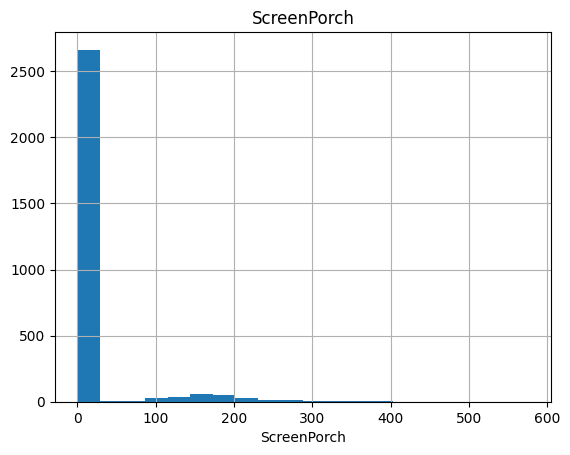

count     2919
unique      14
top          0
freq      2906
Name: PoolArea, dtype: int64


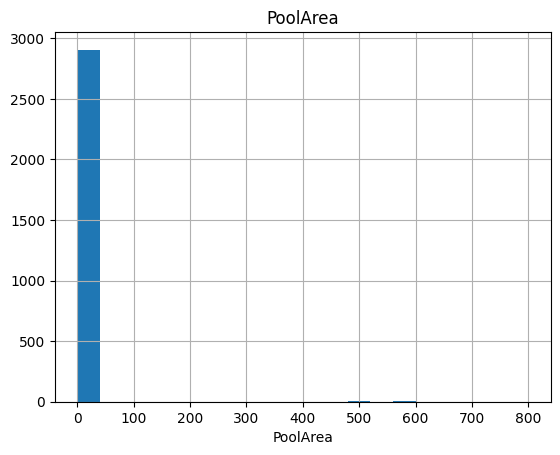

count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64


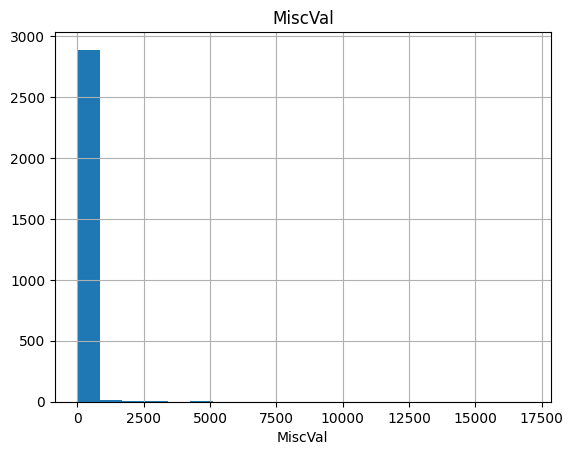

count     2919
unique      12
top          6
freq       503
Name: MoSold, dtype: int64


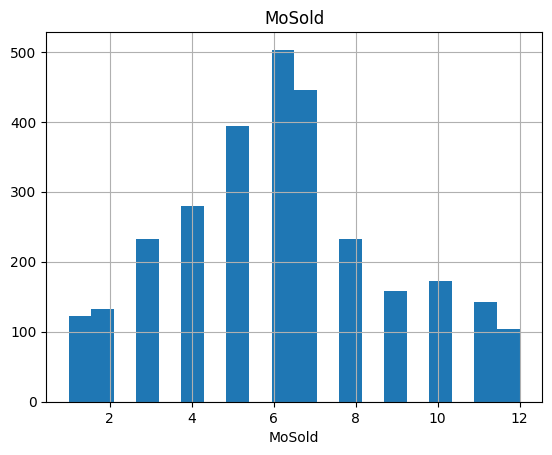

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


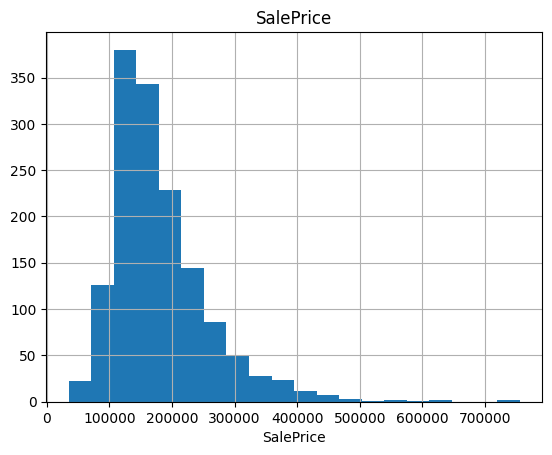

In [28]:
for col in num_cols:
    num_summary(df, col, plot= True)


#  Kategorik değişkenler ile hedef değişken incelemesini yapınız.

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64


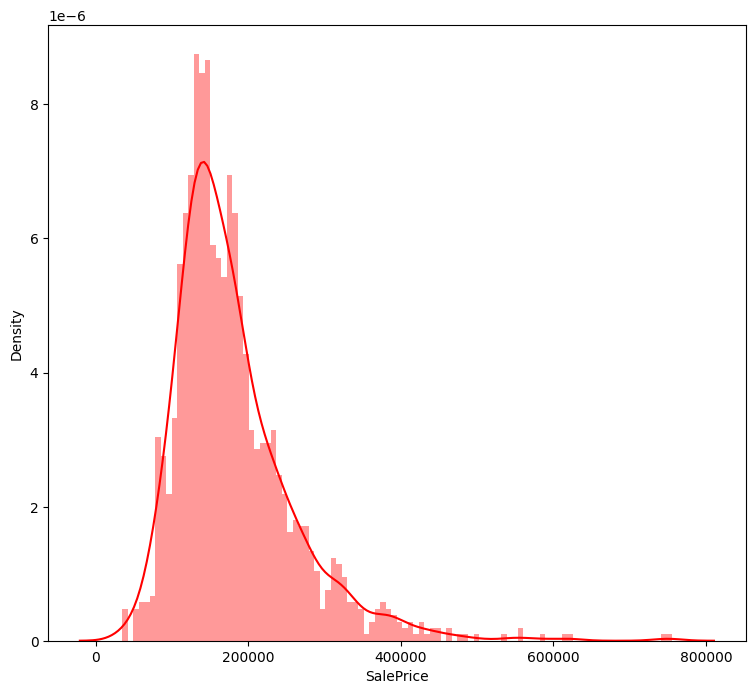

In [29]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='r', bins=100, hist_kws={'alpha': 0.4});

In [30]:
def target_summary_with_cat(dataframe, categorical_col, target, plot=False):
    target_with_cat = dataframe.groupby(categorical_col)[target].mean()
    print(target_with_cat, "\n\n")

    if plot:
        plt.figure(figsize=(12, 5))

        # Bar Plot: Ortalama hedef değerler
        sns.barplot(x=target_with_cat.index, y=target_with_cat.values, palette="viridis")
        plt.title(f'{categorical_col} - Mean {target}', fontsize=14)
        plt.xlabel(categorical_col)
        plt.ylabel(f'Mean of {target}')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


OverallQual
1     50150.000
2     51770.333
3     87473.750
4    108420.655
5    133523.348
6    161603.035
7    207716.423
8    274735.536
9    367513.023
10   438588.389
Name: SalePrice, dtype: float64 




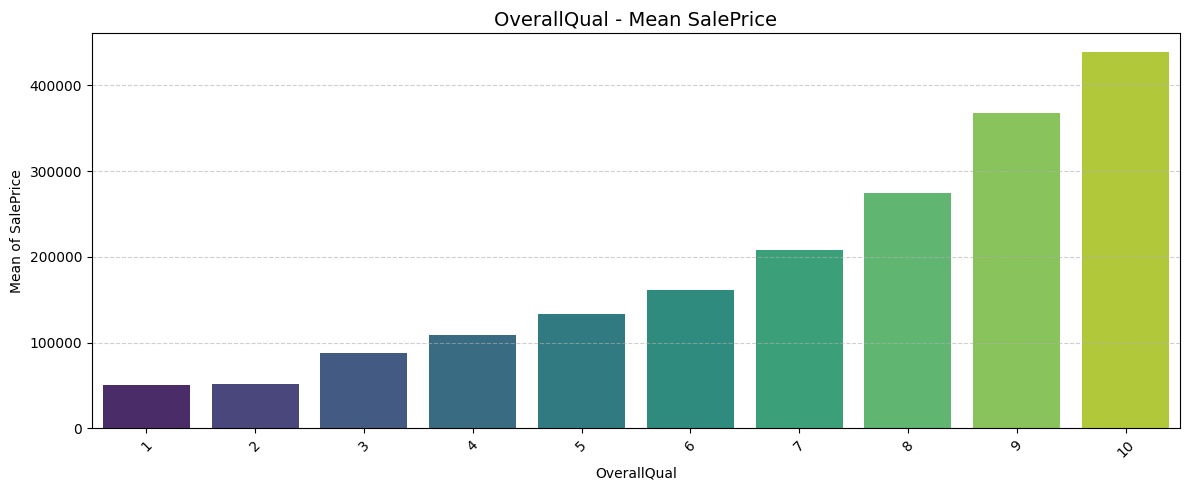

OverallCond
1    61000.000
2   141986.400
3   101929.400
4   120438.439
5   203146.915
6   153961.591
7   158145.488
8   155651.736
9   216004.545
Name: SalePrice, dtype: float64 




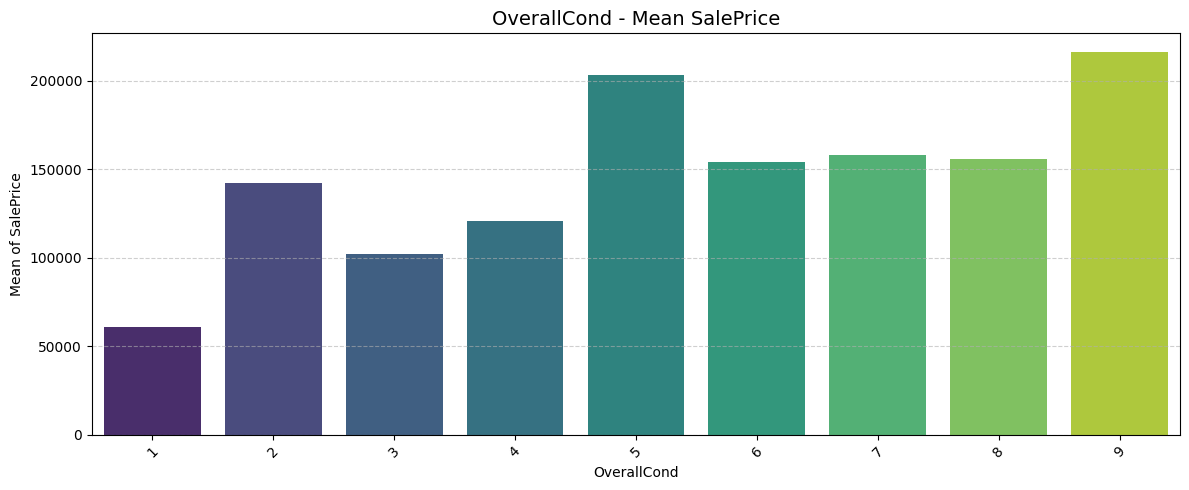

BsmtFullBath
0.000   165521.640
1.000   202522.918
2.000   213063.067
3.000   179000.000
Name: SalePrice, dtype: float64 




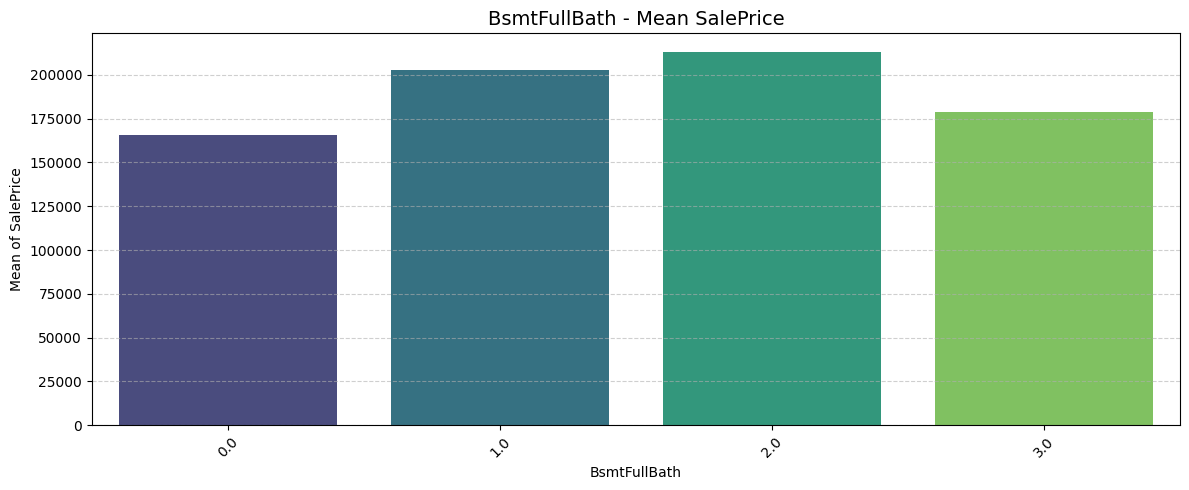

BsmtHalfBath
0.000   181230.330
1.000   176098.125
2.000   160850.500
Name: SalePrice, dtype: float64 




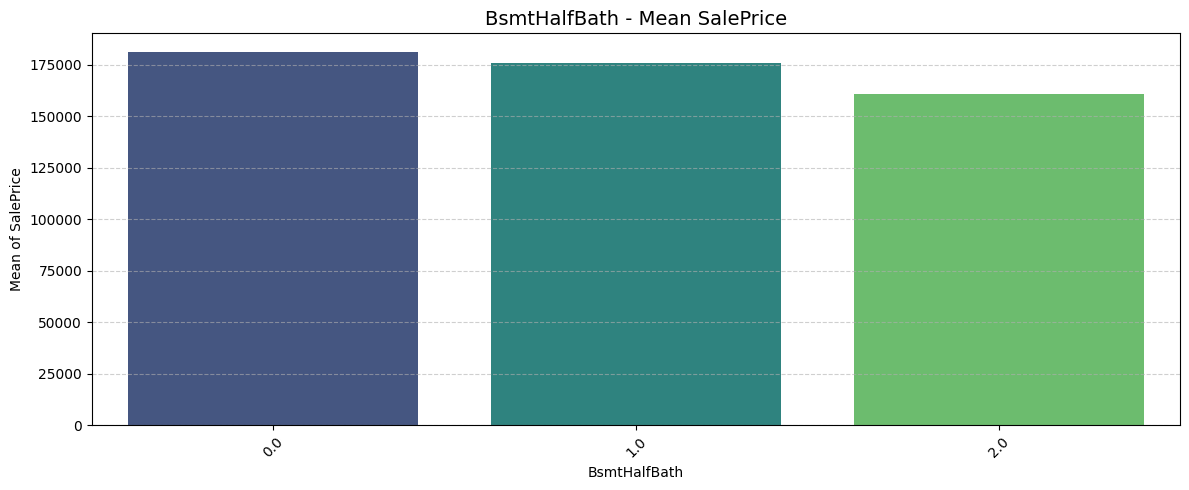

FullBath
0   165200.889
1   134751.440
2   213009.826
3   347822.909
4          NaN
Name: SalePrice, dtype: float64 




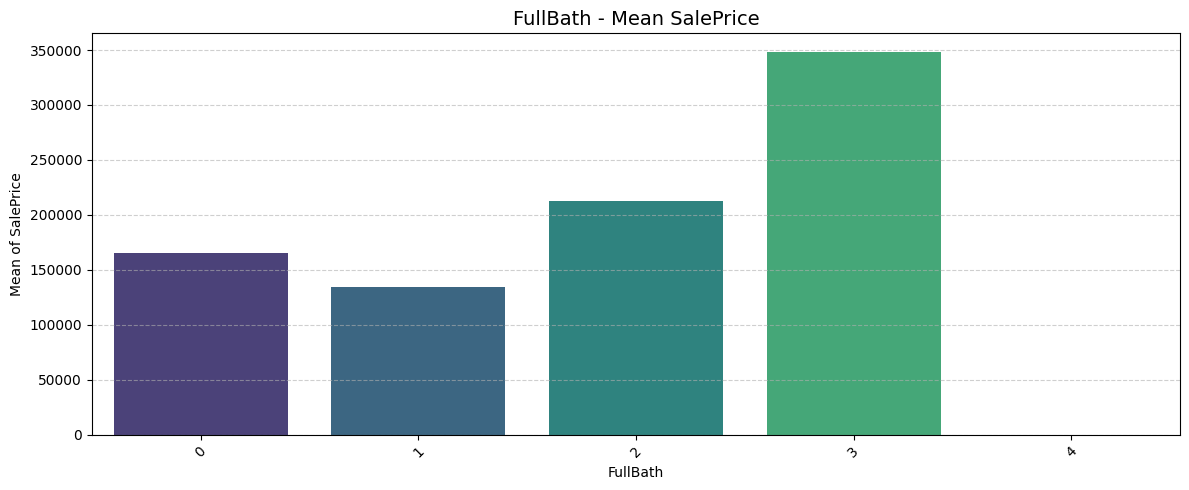

HalfBath
0   162534.885
1   212721.961
2   162028.917
Name: SalePrice, dtype: float64 




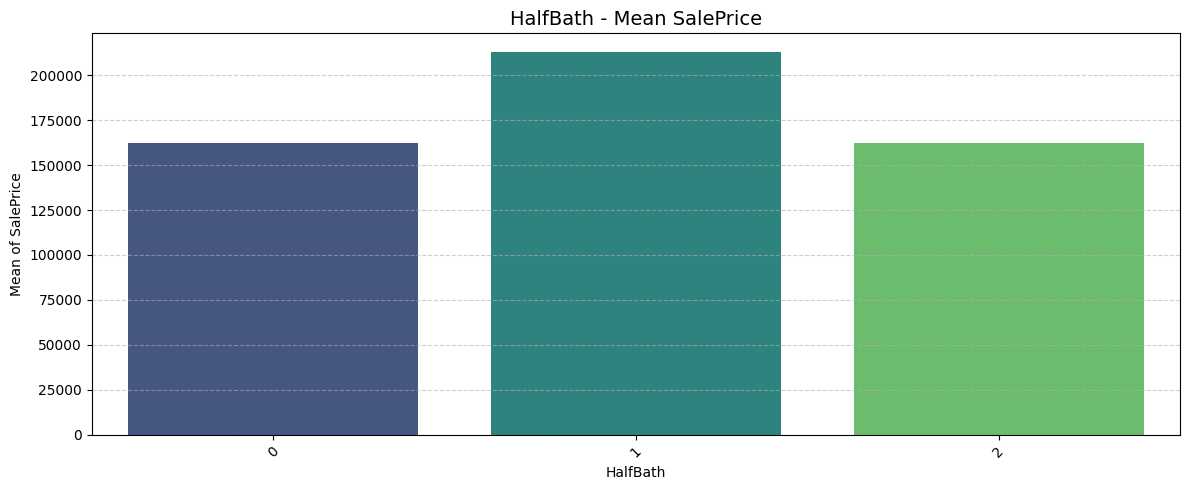

BedroomAbvGr
0   221493.167
1   173162.420
2   158197.659
3   181056.871
4   220421.254
5   180819.048
6   143779.000
8   200000.000
Name: SalePrice, dtype: float64 




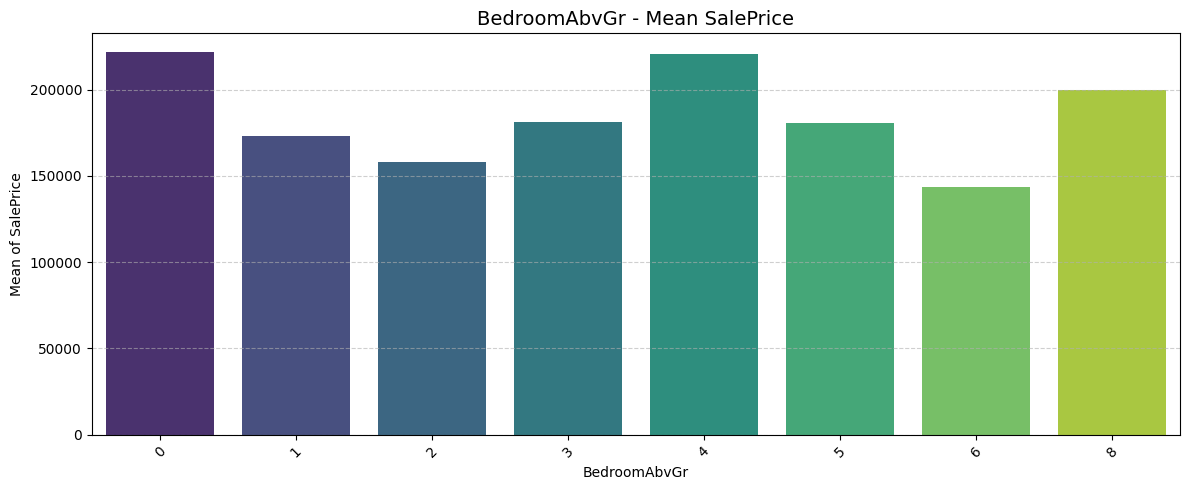

KitchenAbvGr
0   127500.000
1   183388.790
2   131096.154
3   109500.000
Name: SalePrice, dtype: float64 




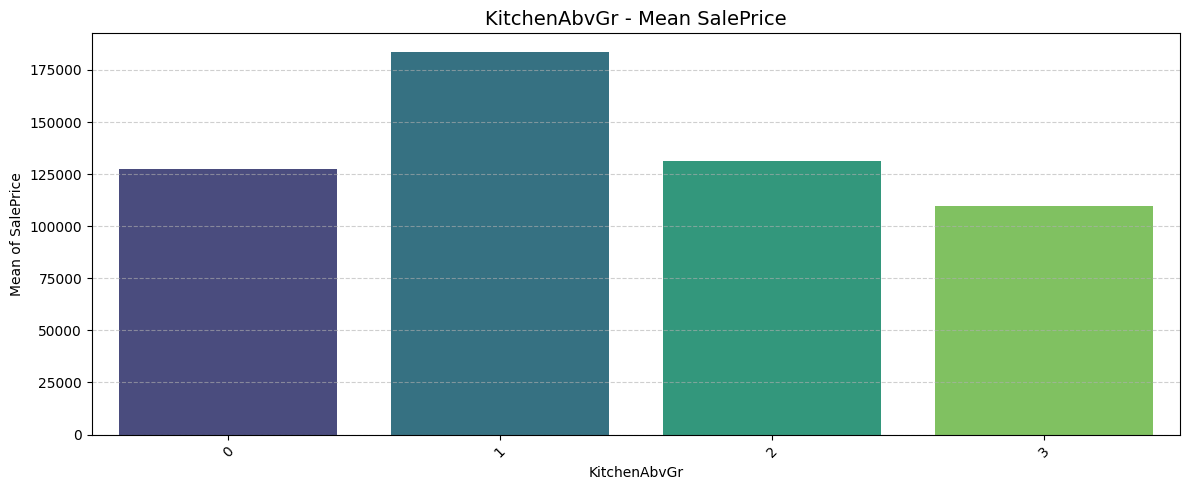

TotRmsAbvGrd
2     39300.000
3    111217.647
4    122844.629
5    141550.749
6    161303.296
7    196666.784
8    213427.529
9    252988.173
10   296279.170
11   318022.000
12   280971.455
13          NaN
14   200000.000
15          NaN
Name: SalePrice, dtype: float64 




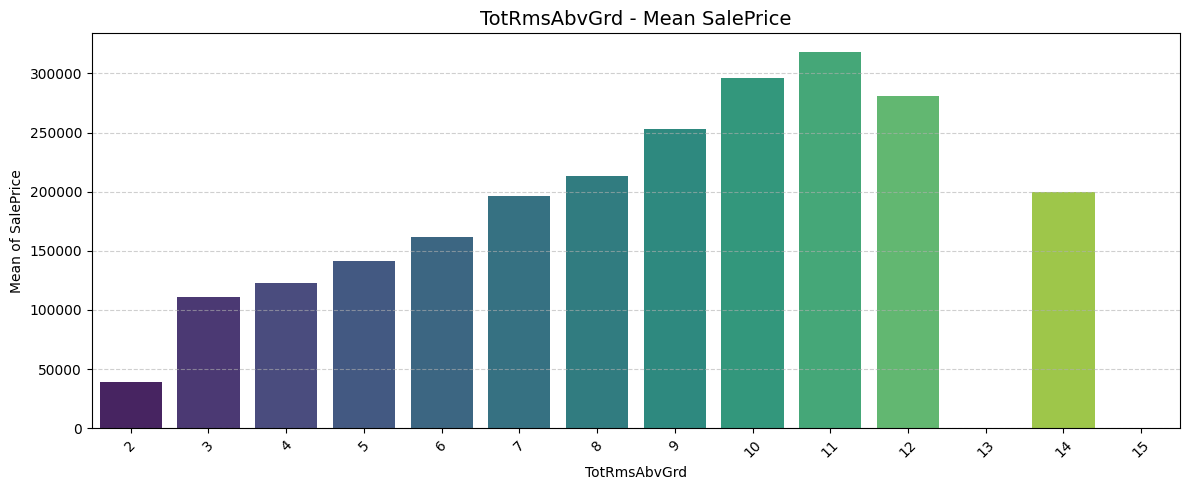

Fireplaces
0   141331.483
1   211843.909
2   240588.539
3   252000.000
4          NaN
Name: SalePrice, dtype: float64 




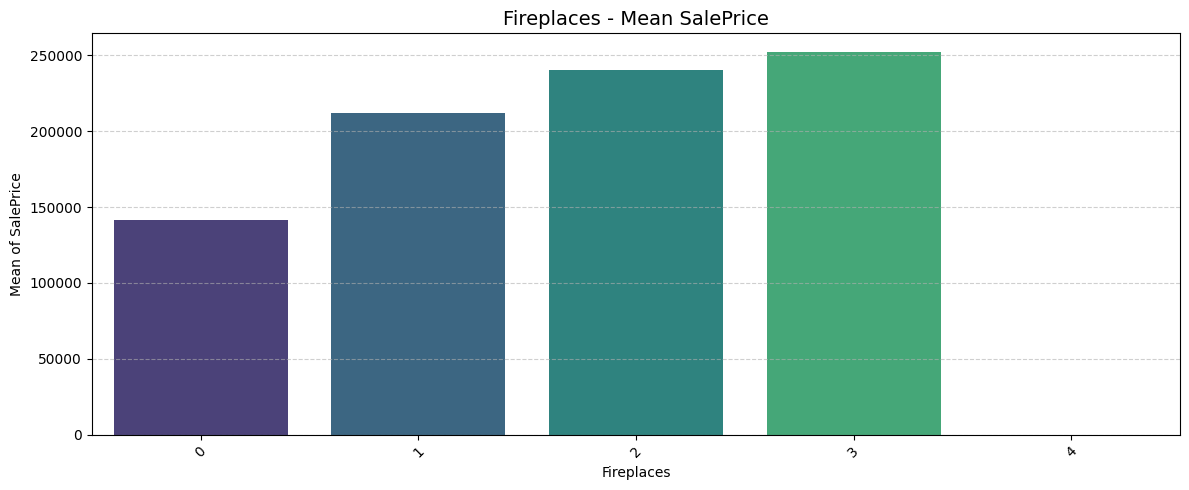

GarageCars
0.000   103317.284
1.000   128116.688
2.000   183851.664
3.000   309636.122
4.000   192655.800
5.000          NaN
Name: SalePrice, dtype: float64 




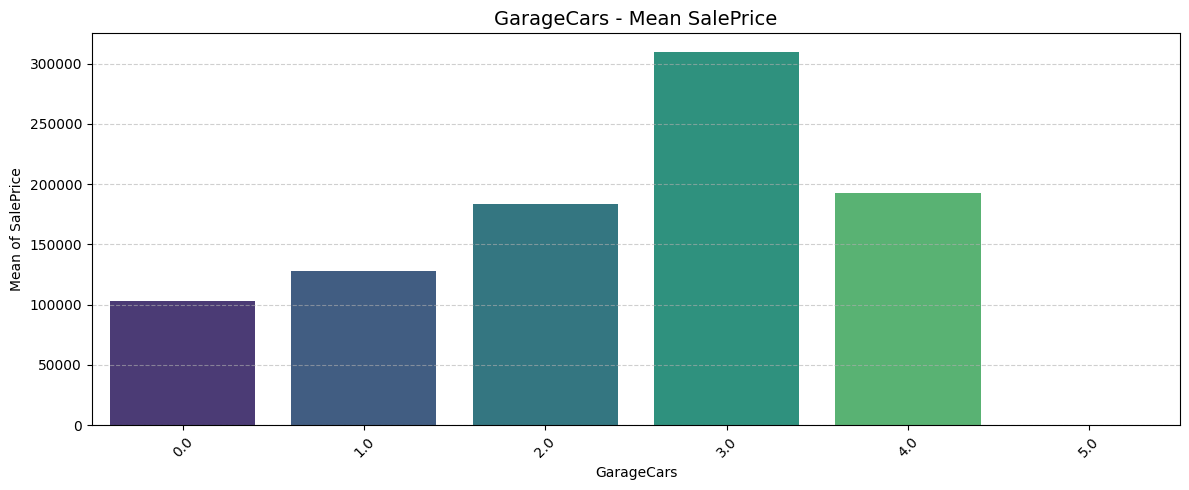

PoolArea
0     180404.663
144          NaN
228          NaN
368          NaN
444          NaN
480   160000.000
512   235000.000
519   250000.000
555   745000.000
561          NaN
576   171000.000
648   181000.000
738   274970.000
800          NaN
Name: SalePrice, dtype: float64 




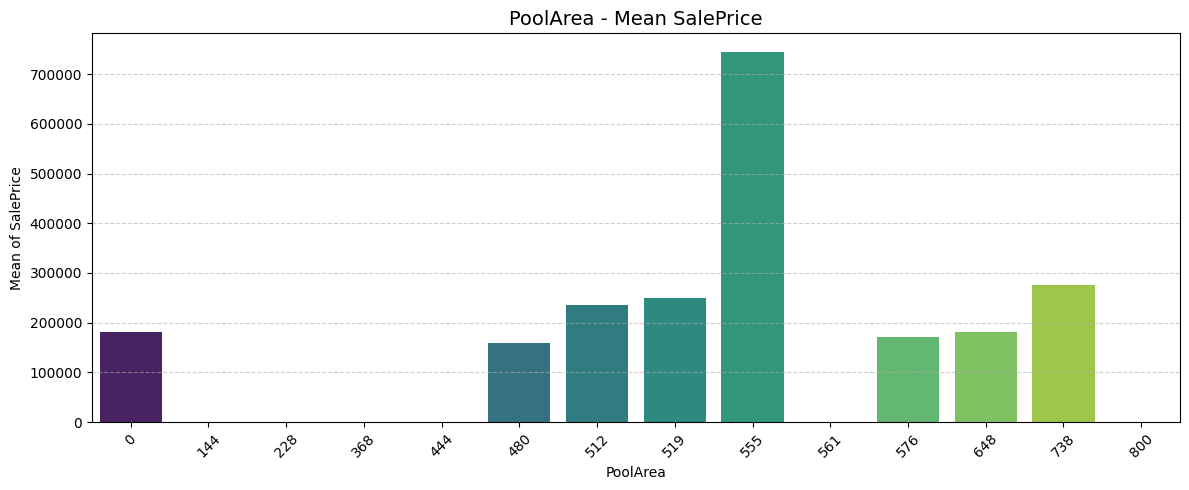

MoSold
1    183256.259
2    177882.000
3    183253.925
4    171503.262
5    172307.270
6    177395.735
7    186331.192
8    184651.828
9    195683.206
10   179563.978
11   192210.911
12   186518.966
Name: SalePrice, dtype: float64 




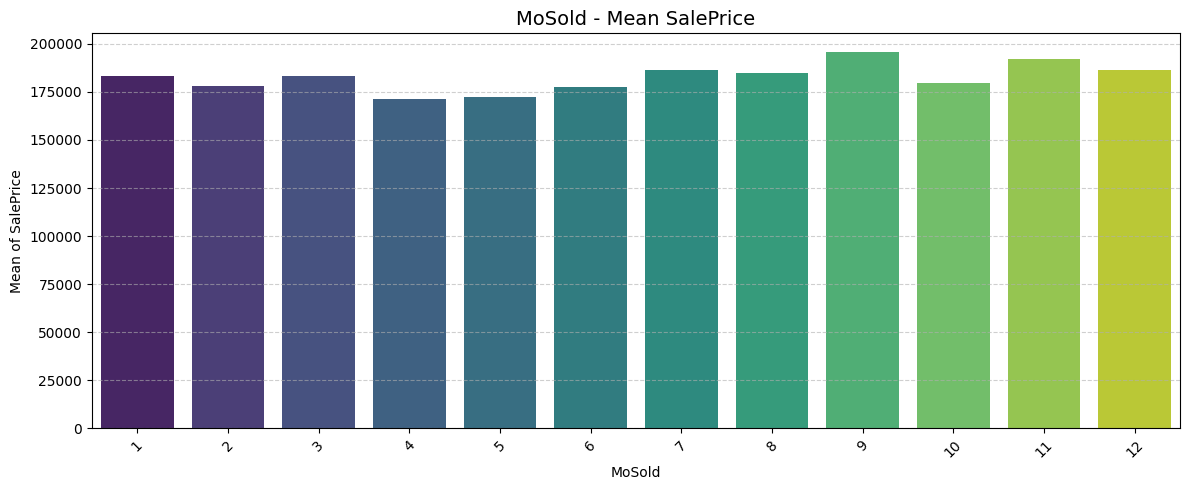

YrSold
2006   182549.459
2007   186063.152
2008   177360.839
2009   179432.104
2010   177393.674
Name: SalePrice, dtype: float64 




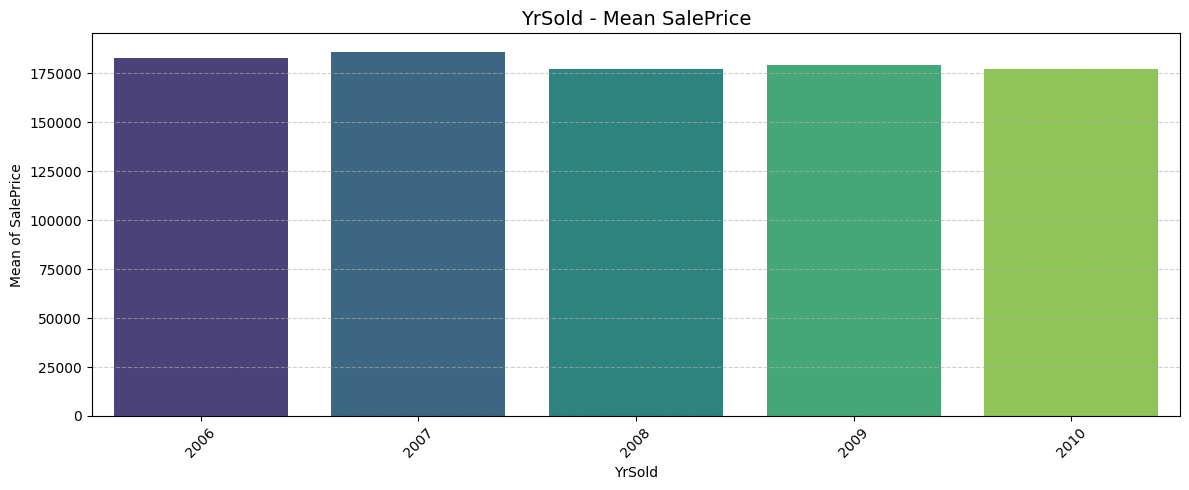

In [31]:
for col in categorical_candidates:
    target_summary_with_cat(df, col, "SalePrice", plot=True)


In [32]:
def target_summary_with_cat(dataframe, target, categorical_col,plot=False):
    targey_sum_cat=pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)})
    
    print(targey_sum_cat, end="\n\n\n")
    
    if plot:
        # Pie chart için veriler
        labels = targey_sum_cat.index
        sizes = targey_sum_cat["Count"]

        # Özel autopct format fonksiyonu
        def autopct_format(pct, all_vals):
            total = sum(all_vals)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'

        fig, ax = plt.subplots(figsize=(4,4))
        wedges, texts, autotexts = ax.pie(
            sizes, labels=labels, startangle=90,
            autopct=lambda pct: autopct_format(pct, sizes),
            textprops={'fontsize': 8}, pctdistance=0.85, 
            colors=plt.cm.Paired.colors)

        # Grafik başlığı
        plt.title(f'Distribution of {categorical_col}', fontsize=14)
        plt.show()

          TARGET_MEAN  Count  Ratio
MSZoning                           
C (all)     74528.000     25  0.856
FV         214014.062    139  4.762
RH         131558.375     26  0.891
RL         191004.995   2265 77.595
RM         126316.830    460 15.759




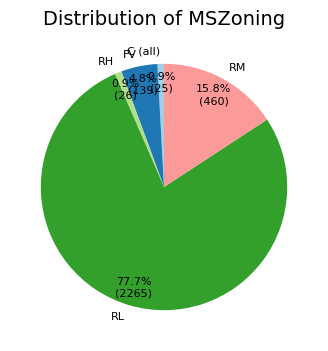

        TARGET_MEAN  Count  Ratio
Street                           
Grvl     130190.500     12  0.411
Pave     181130.539   2907 99.589




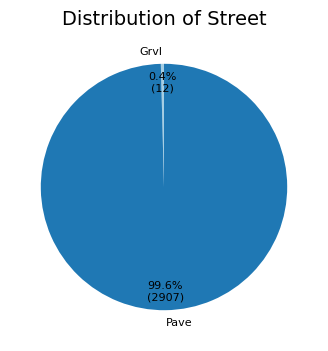

       TARGET_MEAN  Count  Ratio
Alley                           
Grvl    122219.080    120  4.111
Pave    168000.585     78  2.672




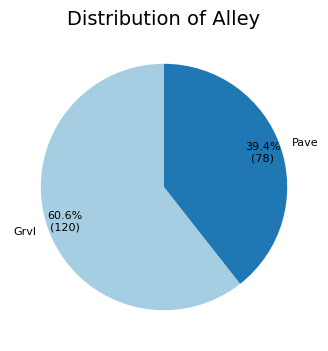

          TARGET_MEAN  Count  Ratio
LotShape                           
IR1        206101.665    968 33.162
IR2        239833.366     76  2.604
IR3        216036.500     16  0.548
Reg        164754.818   1859 63.686




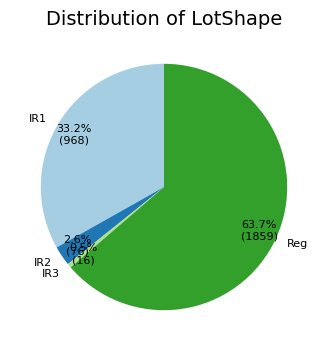

             TARGET_MEAN  Count  Ratio
LandContour                           
Bnk           143104.079    117  4.008
HLS           231533.940    120  4.111
Low           203661.111     60  2.055
Lvl           180183.747   2622 89.825




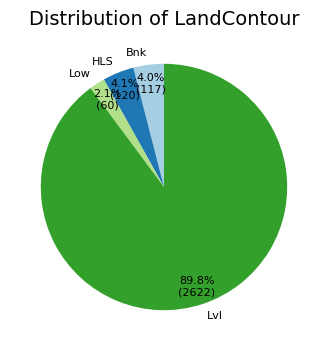

           TARGET_MEAN  Count  Ratio
Utilities                           
AllPub      180950.957   2916 99.897
NoSeWa      137500.000      1  0.034




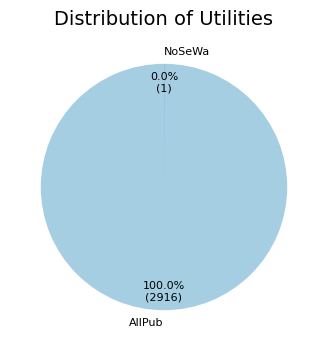

           TARGET_MEAN  Count  Ratio
LotConfig                           
Corner      181623.426    511 17.506
CulDSac     223854.617    176  6.029
FR2         177934.574     85  2.912
FR3         208475.000     14  0.480
Inside      176938.048   2133 73.073




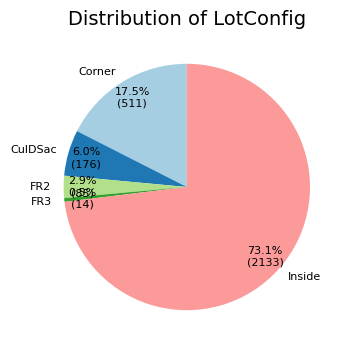

           TARGET_MEAN  Count  Ratio
LandSlope                           
Gtl         179956.800   2778 95.170
Mod         196734.138    125  4.282
Sev         204379.231     16  0.548




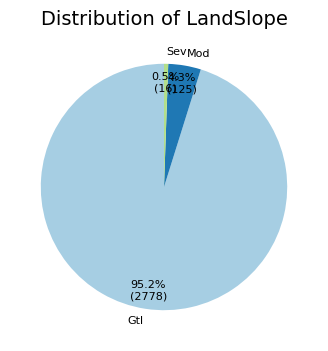

            TARGET_MEAN  Count  Ratio
Condition1                           
Artery       135091.667     92  3.152
Feedr        142475.481    164  5.618
Norm         184495.492   2511 86.023
PosA         225875.000     20  0.685
PosN         215184.211     39  1.336
RRAe         138400.000     28  0.959
RRAn         184396.615     50  1.713
RRNe         190750.000      6  0.206
RRNn         212400.000      9  0.308




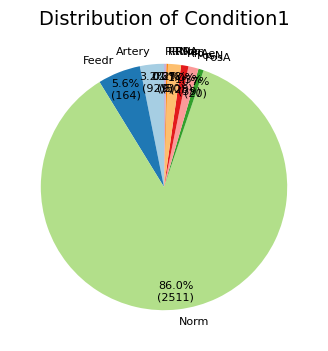

            TARGET_MEAN  Count  Ratio
Condition2                           
Artery       106500.000      5  0.171
Feedr        121166.667     13  0.445
Norm         181169.406   2889 98.972
PosA         325000.000      4  0.137
PosN         284875.000      4  0.137
RRAe         190000.000      1  0.034
RRAn         136905.000      1  0.034
RRNn          96750.000      2  0.069




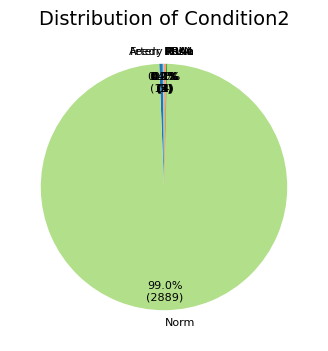

          TARGET_MEAN  Count  Ratio
BldgType                           
1Fam       185763.807   2425 83.076
2fmCon     128432.258     62  2.124
Duplex     133541.077    109  3.734
Twnhs      135911.628     96  3.289
TwnhsE     181959.342    227  7.777




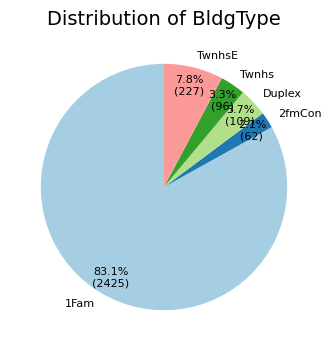

            TARGET_MEAN  Count  Ratio
HouseStyle                           
1.5Fin       143116.740    314 10.757
1.5Unf       110150.000     19  0.651
1Story       175985.478   1471 50.394
2.5Fin       220000.000      8  0.274
2.5Unf       157354.545     24  0.822
2Story       210051.764    872 29.873
SFoyer       135074.486     83  2.843
SLvl         166703.385    128  4.385




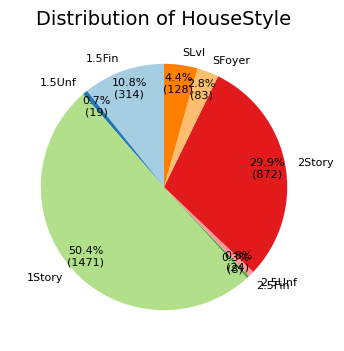

           TARGET_MEAN  Count  Ratio
RoofStyle                           
Flat        194690.000     20  0.685
Gable       171483.956   2310 79.137
Gambrel     148909.091     22  0.754
Hip         218876.934    551 18.876
Mansard     180568.429     11  0.377
Shed        225000.000      5  0.171




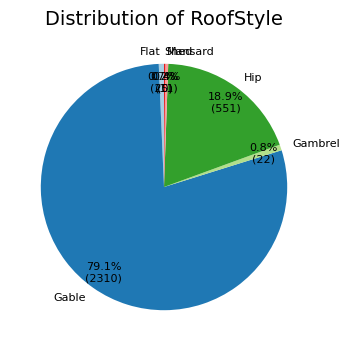

          TARGET_MEAN  Count  Ratio
RoofMatl                           
ClyTile    160000.000      1  0.034
CompShg    179803.679   2876 98.527
Membran    241500.000      1  0.034
Metal      180000.000      1  0.034
Roll       137000.000      1  0.034
Tar&Grv    185406.364     23  0.788
WdShake    241400.000      9  0.308
WdShngl    390250.000      7  0.240




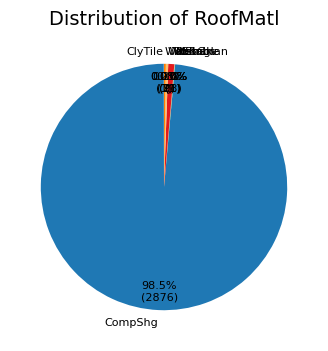

             TARGET_MEAN  Count  Ratio
Exterior1st                           
AsbShng       107385.550     44  1.507
AsphShn       100000.000      2  0.069
BrkComm        71000.000      6  0.206
BrkFace       194573.000     87  2.980
CBlock        105000.000      2  0.069
CemntBd       231690.656    126  4.317
HdBoard       163077.450    442 15.142
ImStucc       262000.000      1  0.034
MetalSd       149422.177    450 15.416
Plywood       175942.380    221  7.571
Stone         258500.000      2  0.069
Stucco        162990.000     43  1.473
VinylSd       213732.901   1025 35.115
Wd Sdng       149841.646    411 14.080
WdShing       150655.077     56  1.918




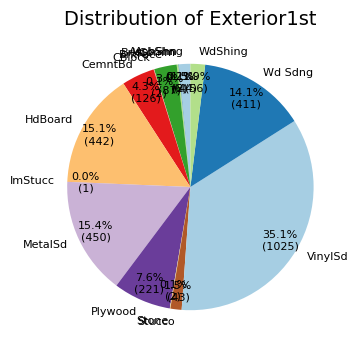

             TARGET_MEAN  Count  Ratio
Exterior2nd                           
AsbShng       114060.550     38  1.302
AsphShn       138000.000      4  0.137
Brk Cmn       126714.286     22  0.754
BrkFace       195818.000     47  1.610
CBlock        105000.000      3  0.103
CmentBd       230093.833    126  4.317
HdBoard       167661.565    406 13.909
ImStucc       252070.000     15  0.514
MetalSd       149803.173    447 15.313
Other         319000.000      1  0.034
Plywood       168112.387    270  9.250
Stone         158224.800      6  0.206
Stucco        155905.154     47  1.610
VinylSd       214432.460   1014 34.738
Wd Sdng       148386.066    391 13.395
Wd Shng       161328.947     81  2.775




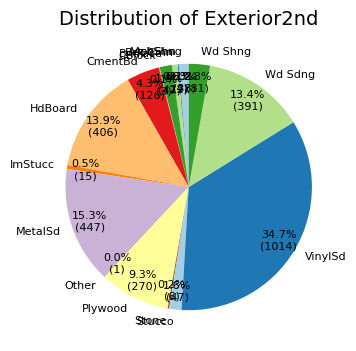

            TARGET_MEAN  Count  Ratio
MasVnrType                           
BrkCmn       146318.067     25  0.856
BrkFace      204691.872    879 30.113
Stone        265583.625    249  8.530




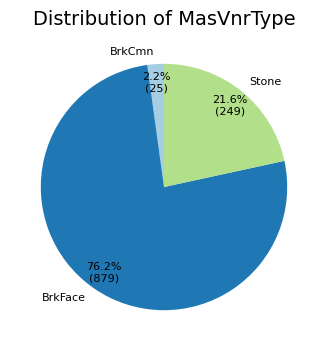

           TARGET_MEAN  Count  Ratio
ExterQual                           
Ex          367360.962    107  3.666
Fa           87985.214     35  1.199
Gd          231633.510    979 33.539
TA          144341.313   1798 61.596




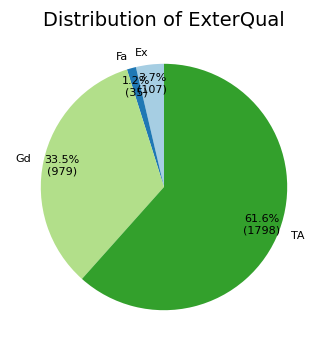

           TARGET_MEAN  Count  Ratio
ExterCond                           
Ex          201333.333     12  0.411
Fa          102595.143     67  2.295
Gd          168897.568    299 10.243
Po           76500.000      3  0.103
TA          184034.896   2538 86.948




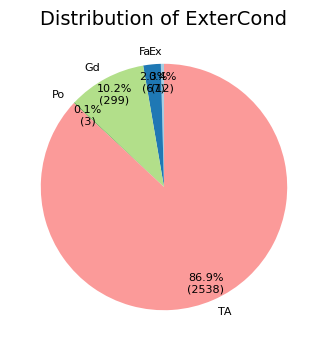

            TARGET_MEAN  Count  Ratio
Foundation                           
BrkTil       132291.075    311 10.654
CBlock       149805.715   1235 42.309
PConc        225230.442   1308 44.810
Slab         107365.625     49  1.679
Stone        165959.167     11  0.377
Wood         185666.667      5  0.171




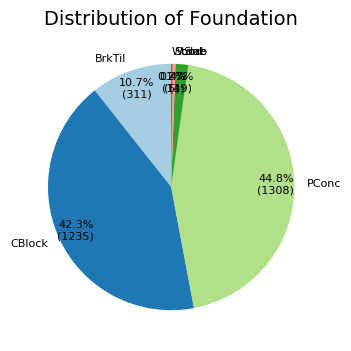

          TARGET_MEAN  Count  Ratio
BsmtQual                           
Ex         327041.041    258  8.839
Fa         115692.029     88  3.015
Gd         202688.479   1209 41.418
TA         140759.818   1283 43.953




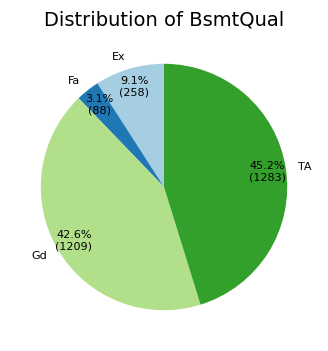

          TARGET_MEAN  Count  Ratio
BsmtCond                           
Fa         121809.533    104  3.563
Gd         213599.908    122  4.180
Po          64000.000      5  0.171
TA         183632.621   2606 89.277




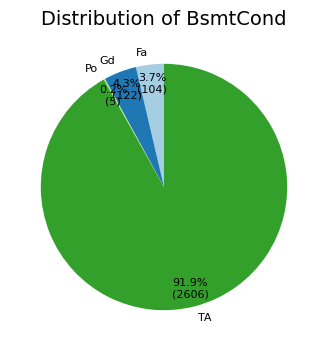

              TARGET_MEAN  Count  Ratio
BsmtExposure                           
Av             206643.421    418 14.320
Gd             257689.806    276  9.455
Mn             192789.658    239  8.188
No             165652.296   1904 65.228




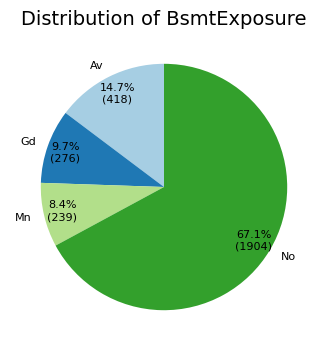

              TARGET_MEAN  Count  Ratio
BsmtFinType1                           
ALQ            161573.068    429 14.697
BLQ            149493.655    269  9.215
GLQ            235413.720    849 29.085
LwQ            151852.703    154  5.276
Rec            146889.248    288  9.866
Unf            170670.577    851 29.154




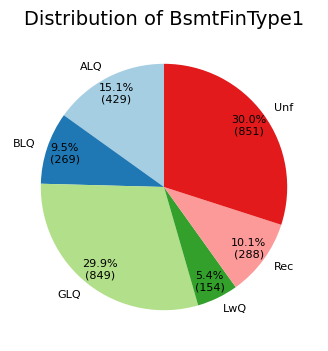

              TARGET_MEAN  Count  Ratio
BsmtFinType2                           
ALQ            209942.105     52  1.781
BLQ            151101.000     68  2.330
GLQ            180982.143     34  1.165
LwQ            164364.130     87  2.980
Rec            164917.130    105  3.597
Unf            184694.690   2493 85.406




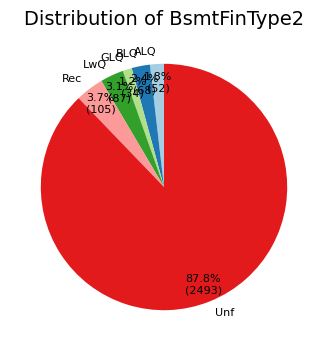

         TARGET_MEAN  Count  Ratio
Heating                           
Floor      72500.000      1  0.034
GasA      182021.195   2874 98.458
GasW      166632.167     27  0.925
Grav       75271.429      9  0.308
OthW      125750.000      2  0.069
Wall       92100.000      6  0.206




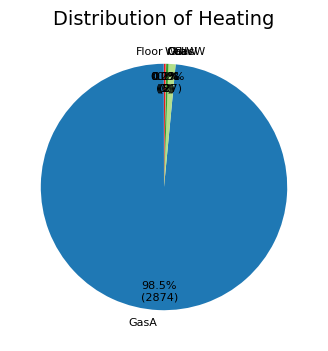

           TARGET_MEAN  Count  Ratio
HeatingQC                           
Ex          214914.429   1493 51.148
Fa          123919.490     92  3.152
Gd          156858.871    474 16.238
Po           87000.000      3  0.103
TA          142362.876    857 29.359




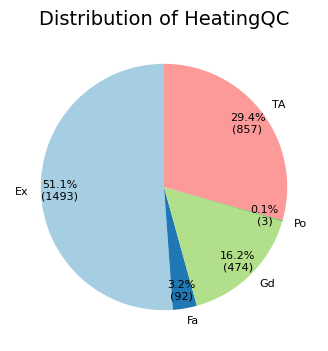

            TARGET_MEAN  Count  Ratio
CentralAir                           
N            105264.074    196  6.715
Y            186186.710   2723 93.285




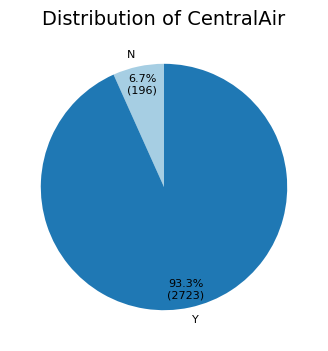

            TARGET_MEAN  Count  Ratio
Electrical                           
FuseA        122196.894    188  6.441
FuseF        107675.444     50  1.713
FuseP         97333.333      8  0.274
Mix           67000.000      1  0.034
SBrkr        186825.113   2671 91.504




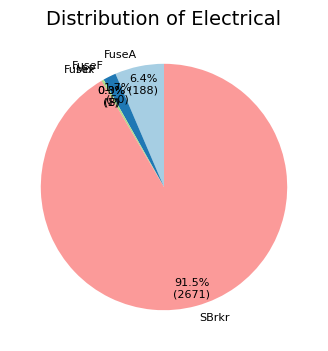

             TARGET_MEAN  Count  Ratio
KitchenQual                           
Ex            328554.670    205  7.023
Fa            105565.205     70  2.398
Gd            212116.024   1151 39.431
TA            139962.512   1492 51.113




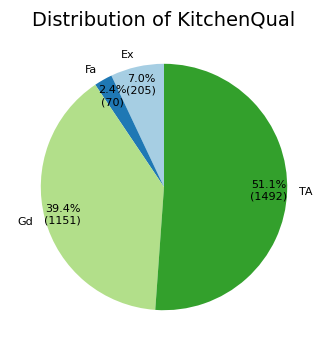

            TARGET_MEAN  Count  Ratio
Functional                           
Maj1         153948.143     19  0.651
Maj2          85800.000      9  0.308
Min1         146385.484     65  2.227
Min2         144240.647     70  2.398
Mod          168393.333     35  1.199
Sev          129000.000      2  0.069
Typ          183429.147   2717 93.080




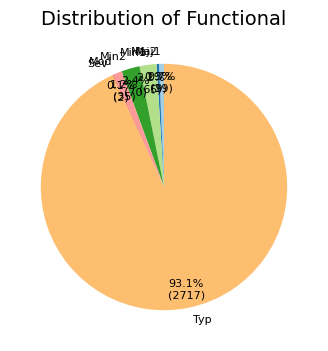

             TARGET_MEAN  Count  Ratio
FireplaceQu                           
Ex            337712.500     43  1.473
Fa            167298.485     74  2.535
Gd            226351.416    744 25.488
Po            129764.150     46  1.576
TA            205723.489    592 20.281




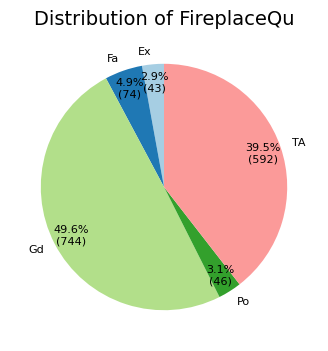

            TARGET_MEAN  Count  Ratio
GarageType                           
2Types       151283.333     23  0.788
Attchd       202892.656   1723 59.027
Basment      160570.684     36  1.233
BuiltIn      254751.739    186  6.372
CarPort      109962.111     15  0.514
Detchd       134091.163    779 26.687




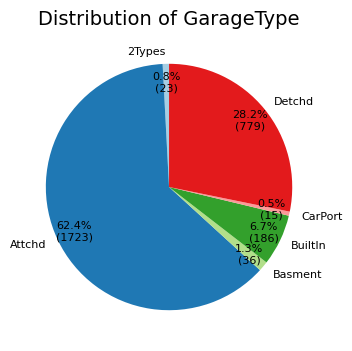

              TARGET_MEAN  Count  Ratio
GarageFinish                           
Fin            240052.690    719 24.632
RFn            202068.870    811 27.783
Unf            142156.423   1230 42.138




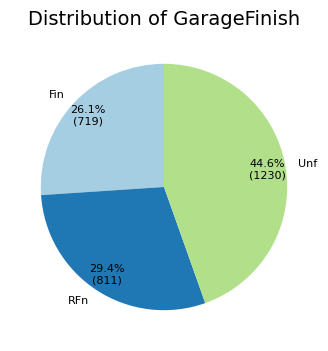

            TARGET_MEAN  Count  Ratio
GarageQual                           
Ex           241000.000      3  0.103
Fa           123573.354    124  4.248
Gd           215860.714     24  0.822
Po           100166.667      5  0.171
TA           187489.836   2604 89.209




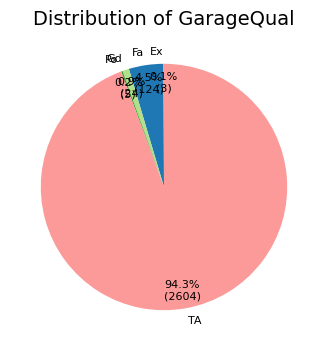

            TARGET_MEAN  Count  Ratio
GarageCond                           
Ex           124000.000      3  0.103
Fa           114654.029     74  2.535
Gd           179930.000     15  0.514
Po           108500.000     14  0.480
TA           187885.735   2654 90.922




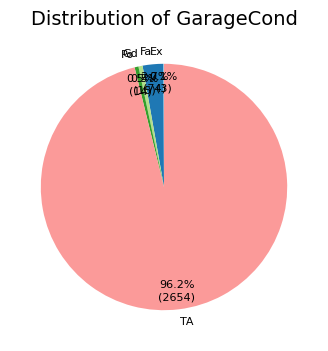

            TARGET_MEAN  Count  Ratio
PavedDrive                           
N            115039.122    216  7.400
P            132330.000     62  2.124
Y            186433.974   2641 90.476




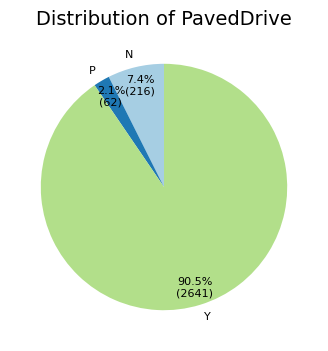

        TARGET_MEAN  Count  Ratio
PoolQC                           
Ex       490000.000      4  0.137
Fa       215500.000      2  0.069
Gd       201990.000      4  0.137




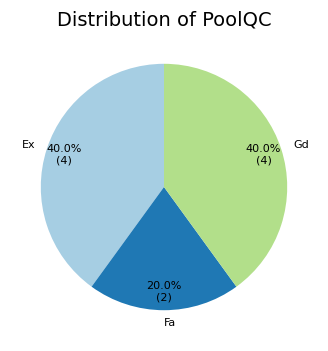

       TARGET_MEAN  Count  Ratio
Fence                           
GdPrv   178927.458    118  4.042
GdWo    140379.315    112  3.837
MnPrv   148751.089    329 11.271
MnWw    134286.364     12  0.411




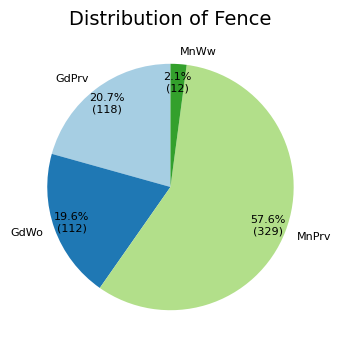

             TARGET_MEAN  Count  Ratio
MiscFeature                           
Gar2          170750.000      5  0.171
Othr           94000.000      4  0.137
Shed          151187.612     95  3.255
TenC          250000.000      1  0.034




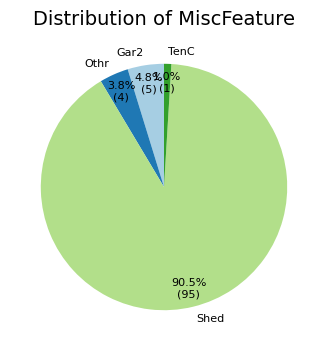

          TARGET_MEAN  Count  Ratio
SaleType                           
COD        143973.256     87  2.980
CWD        210600.000     12  0.411
Con        269600.000      5  0.171
ConLD      138780.889     26  0.891
ConLI      200390.000      9  0.308
ConLw      143700.000      8  0.274
New        274945.418    239  8.188
Oth        119850.000      7  0.240
WD         173401.837   2525 86.502




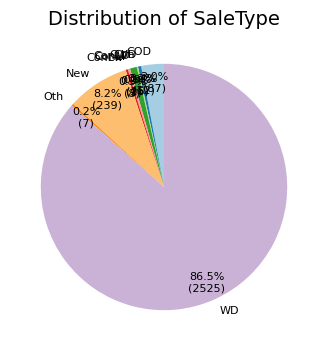

               TARGET_MEAN  Count  Ratio
SaleCondition                           
Abnorml         146526.624    190  6.509
AdjLand         104125.000     12  0.411
Alloca          167377.417     24  0.822
Family          149600.000     46  1.576
Normal          175202.220   2402 82.288
Partial         272291.752    245  8.393




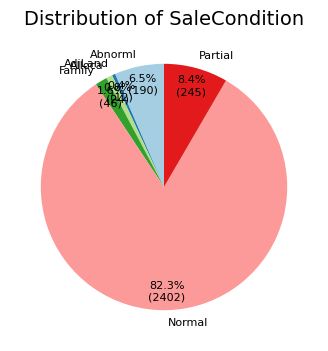

             TARGET_MEAN  Count  Ratio
OverallCond                           
1              61000.000      7  0.240
2             141986.400     10  0.343
3             101929.400     50  1.713
4             120438.439    101  3.460
5             203146.915   1645 56.355
6             153961.591    531 18.191
7             158145.488    390 13.361
8             155651.736    144  4.933
9             216004.545     41  1.405




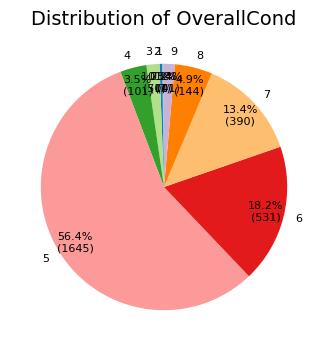

              TARGET_MEAN  Count  Ratio
BsmtFullBath                           
0.000          165521.640   1705 58.410
1.000          202522.918   1172 40.151
2.000          213063.067     38  1.302
3.000          179000.000      2  0.069




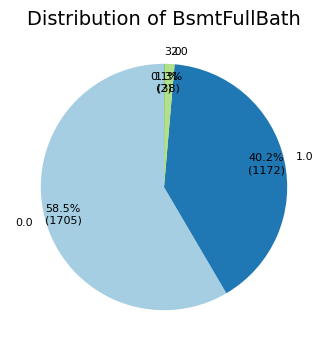

              TARGET_MEAN  Count  Ratio
BsmtHalfBath                           
0.000          181230.330   2742 93.936
1.000          176098.125    171  5.858
2.000          160850.500      4  0.137




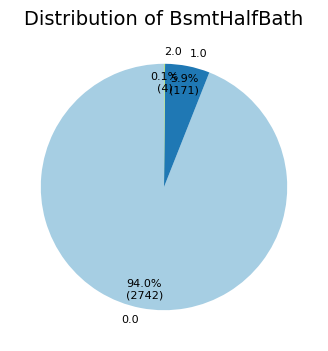

          TARGET_MEAN  Count  Ratio
FullBath                           
0          165200.889     12  0.411
1          134751.440   1309 44.844
2          213009.826   1530 52.415
3          347822.909     64  2.193
4                 NaN      4  0.137




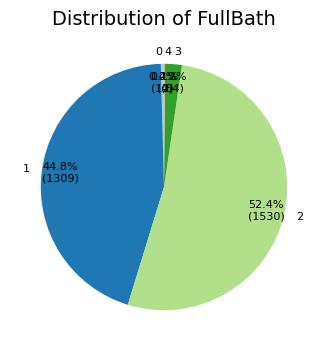

          TARGET_MEAN  Count  Ratio
HalfBath                           
0          162534.885   1834 62.830
1          212721.961   1060 36.314
2          162028.917     25  0.856




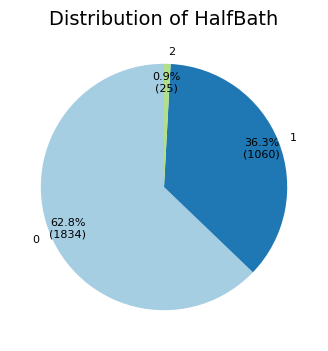

              TARGET_MEAN  Count  Ratio
BedroomAbvGr                           
0              221493.167      8  0.274
1              173162.420    103  3.529
2              158197.659    742 25.420
3              181056.871   1596 54.676
4              220421.254    400 13.703
5              180819.048     48  1.644
6              143779.000     21  0.719
8              200000.000      1  0.034




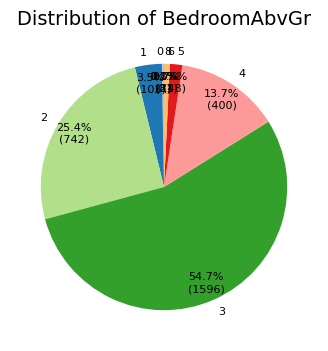

              TARGET_MEAN  Count  Ratio
KitchenAbvGr                           
0              127500.000      3  0.103
1              183388.790   2785 95.409
2              131096.154    129  4.419
3              109500.000      2  0.069




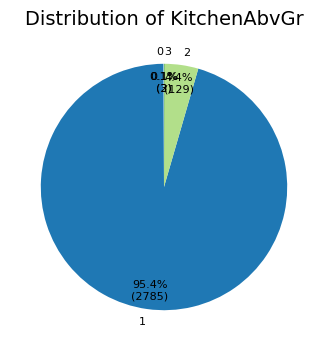

            TARGET_MEAN  Count  Ratio
Fireplaces                           
0            141331.483   1420 48.647
1            211843.909   1268 43.440
2            240588.539    219  7.503
3            252000.000     11  0.377
4                   NaN      1  0.034




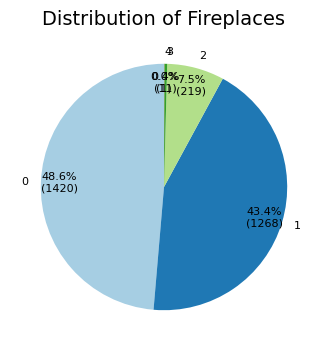

            TARGET_MEAN  Count  Ratio
GarageCars                           
0.000        103317.284    157  5.379
1.000        128116.688    776 26.584
2.000        183851.664   1594 54.608
3.000        309636.122    374 12.813
4.000        192655.800     16  0.548
5.000               NaN      1  0.034




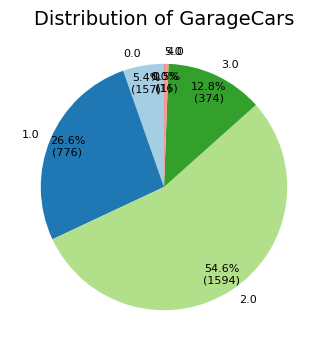

        TARGET_MEAN  Count  Ratio
YrSold                           
2006     182549.459    619 21.206
2007     186063.152    692 23.707
2008     177360.839    622 21.309
2009     179432.104    647 22.165
2010     177393.674    339 11.614




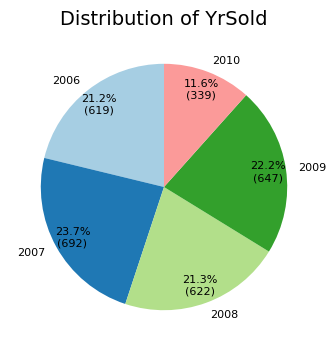

In [33]:
for col in cat_cols:
    target_summary_with_cat(df, "SalePrice", col, plot=True)

### Aykırı gözlem var mı inceleyiniz.

In [34]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return round(low_limit, 4), round(up_limit,4)

In [35]:
num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

In [36]:
for col in num_cols:
    print(col, outlier_thresholds(df, col, q1=0.05, q3=0.95))

Id (-3792.4, 6712.4)
MSSubClass (-190.0, 370.0)
LotFrontage (-80.5, 219.5)
LotArea (-17759.35, 38084.25)
YearBuilt (1777.0, 2145.0)
YearRemodAdd (1864.5, 2092.5)
MasVnrArea (-699.75, 1166.25)
BsmtFinSF1 (-1911.0, 3185.0)
BsmtFinSF2 (-652.5, 1087.5)
BsmtUnfSF (-2212.35, 3687.25)
TotalBsmtSF (-1526.1, 3757.5)
1stFlrSF (-1080.4, 3576.4)
2ndFlrSF (-1696.8, 2828.0)
LowQualFinSF (0.0, 0.0)
GrLivArea (-1543.8, 4869.0)
GarageYrBlt (1809.5, 2125.5)
GarageArea (-1284.225, 2140.375)
WoodDeckSF (-492.0, 820.0)
OpenPorchSF (-274.65, 457.75)
EnclosedPorch (-264.0, 440.0)
3SsnPorch (0.0, 0.0)
ScreenPorch (-241.5, 402.5)
MiscVal (0.0, 0.0)
SalePrice (-269150.0, 683250.0)


In [37]:
# Hangi sayısal değişkenlerde aykırı gözlem olup olmadığını kontrol et
def aykiri_var_mi_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    aykirilar = df[(df[col] < alt_sinir) | (df[col] > ust_sinir)]
    print(f"{col} değişkeninde {len(aykirilar)} aykırı gözlem var.")
    return aykirilar

In [38]:
# Örnek: tüm sayısal değişkenler için çalıştır
for col in df.select_dtypes(include='number').columns:
    aykiri_var_mi_IQR(df, col)

Id değişkeninde 0 aykırı gözlem var.
MSSubClass değişkeninde 207 aykırı gözlem var.
LotFrontage değişkeninde 198 aykırı gözlem var.
LotArea değişkeninde 128 aykırı gözlem var.
YearBuilt değişkeninde 9 aykırı gözlem var.
YearRemodAdd değişkeninde 0 aykırı gözlem var.
MasVnrArea değişkeninde 200 aykırı gözlem var.
BsmtFinSF1 değişkeninde 15 aykırı gözlem var.
BsmtFinSF2 değişkeninde 347 aykırı gözlem var.
BsmtUnfSF değişkeninde 53 aykırı gözlem var.
TotalBsmtSF değişkeninde 122 aykırı gözlem var.
1stFlrSF değişkeninde 42 aykırı gözlem var.
2ndFlrSF değişkeninde 8 aykırı gözlem var.
LowQualFinSF değişkeninde 40 aykırı gözlem var.
GrLivArea değişkeninde 74 aykırı gözlem var.
GarageYrBlt değişkeninde 3 aykırı gözlem var.
GarageArea değişkeninde 42 aykırı gözlem var.
WoodDeckSF değişkeninde 67 aykırı gözlem var.
OpenPorchSF değişkeninde 159 aykırı gözlem var.
EnclosedPorch değişkeninde 459 aykırı gözlem var.
3SsnPorch değişkeninde 37 aykırı gözlem var.
ScreenPorch değişkeninde 256 aykırı göz

In [39]:
# 1. Sayısal sütunları seç
num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# 2. Aykırı eşiklerini belirleme fonksiyonu
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5 * iqr
    up_limit = quartile3 + 1.5 * iqr
    return low_limit, up_limit

In [40]:
# 3. Aykırı değer içerip içermediğini kontrol eden fonksiyon
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return ((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)).any()

# 4. Aykırı değerleri baskılama (winsorizing)
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [41]:
# 5. Tüm sayısal sütunlar için baskılama işlemi
for col in num_cols:
    replace_with_thresholds(df, col)

# 6. Baskılama sonrası hala aykırı var mı kontrol et
for col in num_cols:
    print(col, ":", check_outlier(df, col))

Id : False
MSSubClass : False
LotFrontage : False
LotArea : False
YearBuilt : False
YearRemodAdd : False
MasVnrArea : False
BsmtFinSF1 : False
BsmtFinSF2 : False
BsmtUnfSF : False
TotalBsmtSF : False
1stFlrSF : False
2ndFlrSF : False
LowQualFinSF : False
GrLivArea : False
GarageYrBlt : False
GarageArea : False
WoodDeckSF : False
OpenPorchSF : False
EnclosedPorch : False
3SsnPorch : False
ScreenPorch : False
MiscVal : False
SalePrice : False


In [42]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [43]:
missing_values_table(df)

             n_miss  ratio
PoolQC         2909 99.660
MiscFeature    2814 96.400
Alley          2721 93.220
Fence          2348 80.440
MasVnrType     1766 60.500
...             ...    ...
BsmtFinSF1        1  0.030
Exterior2nd       1  0.030
Exterior1st       1  0.030
SaleType          1  0.030
Electrical        1  0.030

[35 rows x 2 columns]


In [44]:
def quick_missing_imp(data, num_method="median", cat_length=10, target="SalePrice"):
    # Hedef değişkeni geçici olarak sakla
    temp_target = data[target]
    data = data.drop(columns=[target])

    # Sayısal değişkenler
    num_cols = data.select_dtypes(include=["int64", "float64"]).columns

    if num_method == "median":
        for col in num_cols:
            data[col] = data[col].fillna(data[col].median())
    elif num_method == "mean":
        for col in num_cols:
            data[col] = data[col].fillna(data[col].mean())

    # Kategorik değişkenler
    cat_cols = [col for col in data.columns if data[col].dtype == "O" or str(data[col].dtype) == "category"]
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

    # Hedefi geri ekle
    data[target] = temp_target

    return data


In [45]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

In [46]:
### Eksik gözlem var mı inceleyiniz.
# eksik gozlem var mı yok mu sorgusu
df.isnull().values.any()

# degiskenlerdeki eksik deger sayisi
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

#  Rare Encoder uygulayınız.

In [47]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [48]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      25  0.009    74528.000
FV          139  0.048   213539.592
RH           26  0.009   131558.375
RL         2269  0.777   186641.266
RM          460  0.158   125457.083


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl       12  0.004   130190.500
Pave     2907  0.996   177526.056


Alley : 2
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl    2841  0.973   177601.131
Pave      78  0.027   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968  0.332   200291.106
IR2          76  0.026   223401.439
IR3          16  0.005   212540.250
Reg        1859  0.637   162895.429


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            117  0.040   143104.079
HLS            120  0.041   220184.570
Low             60  0.021   201440.97

In [49]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [50]:
rare_encoder(df, 0.01)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL       65.000     8450   Pave  Grvl      Reg   
1        2          20       RL       80.000     9600   Pave  Grvl      Reg   
2        3          60       RL       68.000    11250   Pave  Grvl      IR1   
3        4          70       RL       60.000     9550   Pave  Grvl      IR1   
4        5          60       RL       84.000    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         145       RM       27.500     1936   Pave  Grvl      Reg   
2915  2916         145       RM       27.500     1894   Pave  Grvl      Reg   
2916  2917          20       RL      111.500    17708   Pave  Grvl      Reg   
2917  2918          85       RL       62.000    10441   Pave  Grvl      Reg   
2918  2919          60       RL       74.000     9627   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl         Rare      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0          Norm     1Fam     2Story           7           5   2003.000   
1          Norm     1Fam     1Story           6           8   1976.000   
2          Norm     1Fam     2Story           7           5   2001.000   
3          Norm     1Fam     2Story           7           5   1915.000   
4          Norm     1Fam     2Story           8           5   2000.000   
...         ...      ...        ...         ...         ...        ...   
2914       Norm    Twnhs     2Story           4           7   1970.000   
2915       Norm   TwnhsE     2Story           4           5   1970.000   
2916       Norm     1Fam     1Story           5           7   1960.000   
2917       Norm     1Fam     SFoyer           5           5   1992.000   
2918       Norm     1Fam     2Story           7           5   1993.000   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0         2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1         1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2         2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3         1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4         2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
2914      1970.000     Gable  CompShg     CemntBd     CmentBd    BrkFace   
2915      1970.000     Gable  CompShg     CemntBd     CmentBd    BrkFace   
2916      1996.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2917      1992.000     Gable  CompShg     HdBoard     Wd Shng    BrkFace   
2918      1994.000     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        196.000        Gd        TA      PConc       Gd       TA   
1          0.000        TA        TA     CBlock       Gd       TA   
2        162.000        Gd        TA      PConc       Gd       TA   
3          0.000        TA        TA     BrkTil       TA       Gd   
4        350.000       

# Yeni değişkenler oluşturunuz.

In [51]:
def house_age_group(yearbuilt, yrsold):
    age = yrsold - yearbuilt
    if age <= 10:
        return "Yeni"
    elif age <= 50:
        return "Orta"
    else:
        return "Eski"

In [52]:
df["HouseAgeGroup"] = df.apply(lambda row: house_age_group(row["YearBuilt"], row["YrSold"]), axis=1)

In [53]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave  Grvl      Reg   
1   2          20       RL       80.000     9600   Pave  Grvl      Reg   
2   3          60       RL       68.000    11250   Pave  Grvl      IR1   
3   4          70       RL       60.000     9550   Pave  Grvl      IR1   
4   5          60       RL       84.000    14260   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5   2003.000   
1       Norm     1Fam     1Story           6           8   1976.000   
2       Norm     1Fam     2Story           7           5   2001.000   
3       Norm     1Fam     2Story           7           5   1915.000   
4       Norm     1Fam     2Story           8           5   2000.000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr   856.000       854             0   
1    GasA        Ex          Y      SBrkr  1262.000         0             0   
2    GasA        Ex          Y      SBrkr   920.000       866             0   
3    GasA        Gd          Y      SBrkr   961.000       756             0   
4    GasA        Ex          Y      SBrkr  1145.000      1053             0   

   GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0   1710.000        1.000        0.000        2        1            3   
1   1262.000        0.000        1.000        2        0            3   
2   1786.000        1.000        0.000        2        1            3   
3   1717.000        1.000        0.000        1        0            3   
4   2198.000        1.000        0.000        2        1            4   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu  \
0            1          Gd            8        Typ          0          Gd   
1            1          TA            6        Typ          1          TA   
2            1          Gd            6        Typ          1          TA   
3            1          Gd            7        Typ          1          Gd   
4            1  

In [54]:
#### Encoding işlemlerini gerçekleştiriniz.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [55]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 82
cat_cols: 59
num_cols: 22
cat_but_car: 1
num_but_cat: 16


In [56]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'HouseAgeGroup',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'YrSold']

In [57]:
def binary_cols(dataframe):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ['int64', 'float64'] and dataframe[col].nunique() <= 2]
    return binary_cols

In [58]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [59]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [60]:
binary_cols

['Street', 'Alley', 'Utilities', 'CentralAir']

In [61]:
for col in binary_cols:
    df = label_encoder(df, col)

In [62]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [63]:
df = one_hot_encoder(df, cat_cols)

In [64]:
multi_cat_cols = [col for col in df.columns if df[col].dtype == "object" and df[col].nunique() > 2]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [65]:
# Boolean veri tipindeki sütunları 0-1 sayısala çevir
bool_cols = [col for col in df.columns if df[col].dtype == "bool"]

for col in bool_cols:
    df[col] = df[col].astype(int)

df.head()

Id  MSSubClass  LotFrontage  LotArea OverallQual  YearBuilt  YearRemodAdd  \
0   1          60       65.000     8450           7   2003.000      2003.000   
1   2          20       80.000     9600           6   1976.000      1976.000   
2   3          60       68.000    11250           7   2001.000      2002.000   
3   4          70       60.000     9550           7   1915.000      1970.000   
4   5          60       84.000    14260           8   2000.000      2000.000   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0     196.000     706.000    150.000      856.000   856.000       854   
1       0.000     978.000    284.000     1262.000  1262.000         0   
2     162.000     486.000    434.000      920.000   920.000       866   
3       0.000     216.000    540.000      756.000   961.000       756   
4     350.000     655.000    490.000     1145.000  1145.000      1053   

   GrLivArea TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0   1710.000            8     2003.000     548.000           0           61   
1   1262.000            6     1976.000     460.000         298            0   
2   1786.000            6     2001.000     608.000           0           42   
3   1717.000            7     1998.000     642.000           0           35   
4   2198.000            9     2000.000     836.000         192           84   

  PoolArea MoSold  SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0        0      2 208500.000                 0            0            0   
1        0      5 181500.000                 0            0            0   
2        0      9 223500.000                 0            0            0   
3        0      2 140000.000                 0            0            0   
4        0     12 250000.000                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_0  Street_1  Alley_0  Alley_1  \
0            1            0         0         1        1        0   
1            1            0         0         1        1        0   
2            1            0         0         1        1        0   
3            1            0         0         1        1        0   
4            1            0         0         1        1        0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             0             0             0             1                0   
2             1             0             0             0                0   
3             1             0             0             0                0   
4             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_0  \
0                0                0                1            1   
1                0                0                1            1   
2                0                0                1            1   
3                0                0                1            1   
4                0                0                1            1   

   Utilities_1  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0            0                 0                  0              0   
1            0                 0                  0              1   
2            0                 0                  0              0   
3            0                 1                  0              0   
4            0                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  \
0              0                 1              1              0   
1              0                 0              1              0   
2              0                 1              1              0   
3              0                 0              1              0   
4              0                 0              1              0   

   LandSlope_Sev  Cond


# ✅ Görev 3: Model Kurma ve Değerlendirme🔹 Adım 1: Train ve Test Verisini Ayırın


In [66]:
# Train veri seti: SalePrice değeri DOLU olanlar
train_df = df[df['SalePrice'].notnull()]

# Test veri seti: SalePrice değeri BOŞ (NaN) olanlar
test_df = df[df['SalePrice'].isnull()]


In [67]:
y = train_df['SalePrice'] # np.log1p(df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [69]:
import xgboost as xgb
X = pd.get_dummies(X, drop_first=True)
y = y.astype(float)

# Regressor'ı tekrar tanımla, örneğin:
regressor = xgb.XGBRegressor()

# Sonra CV uygula
rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))

In [70]:
for col in X_train.select_dtypes(['category']).columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)



RMSE: 23304.2372 (LR)
Execution Time: 0.76 seconds

RMSE: 21765.3998 (Ridge)
Execution Time: 0.35 seconds

RMSE: 22988.1581 (Lasso)
Execution Time: 2.21 seconds

RMSE: 24649.3131 (ElasticNet)
Execution Time: 1.48 seconds

RMSE: 35200.5773 (KNN)
Execution Time: 0.23 seconds

RMSE: 33496.3805 (CART)
Execution Time: 0.32 seconds

RMSE: 23024.6712 (RF)
Execution Time: 15.67 seconds

RMSE: 20663.2587 (GBM)
Execution Time: 5.85 seconds

RMSE: 22541.9858 (XGBoost)
Execution Time: 3.65 seconds

RMSE: 21124.1737 (LightGBM)
Execution Time: 1.06 seconds

RMSE: 19068.5882 (CatBoost)
Execution Time: 29.9 seconds



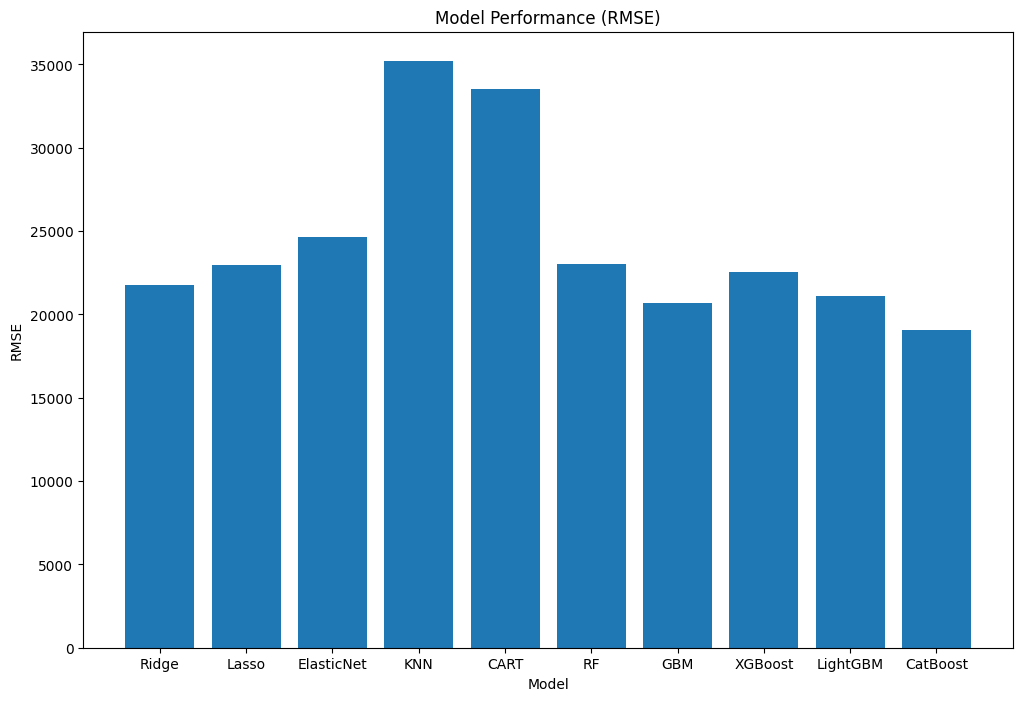

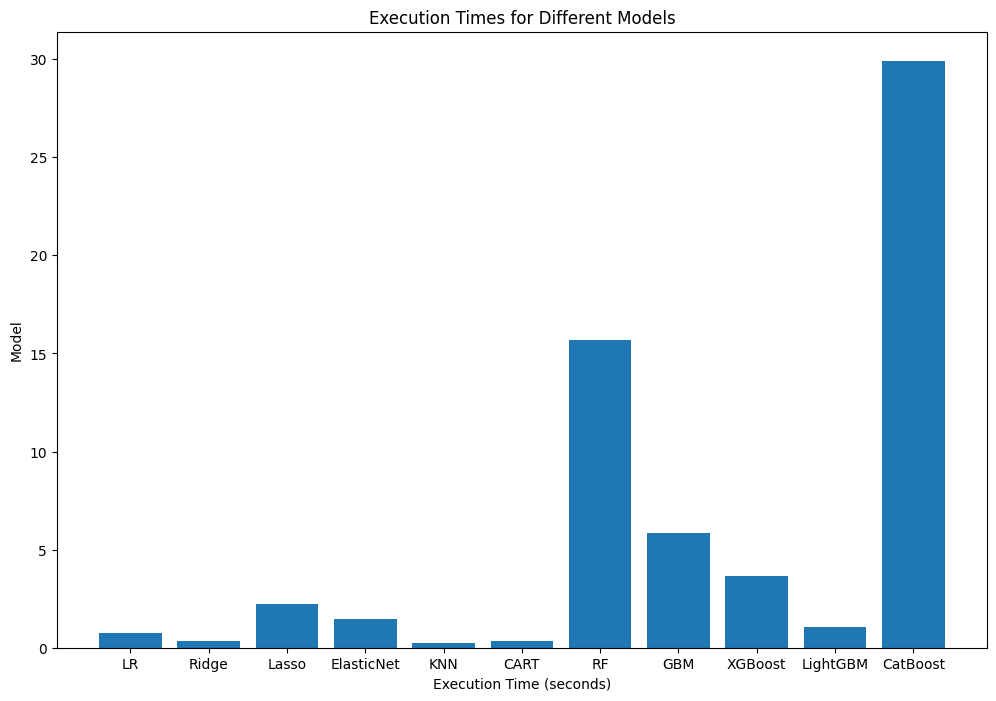

In [71]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")# Plot RMSE scores
plt.figure(figsize=(12, 8))

# Exclude LR from the plot
filtered_scores = [score for name, score in zip([name for name, _ in models], rmse_scores) if name != 'LR']
plt.bar([name for name, _ in models if name != 'LR'], filtered_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot execution times
plt.figure(figsize=(12, 8))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

In [72]:
# Dönüştür
categorical_cols = ['OverallQual', 'TotRmsAbvGrd', 'PoolArea', 'MoSold']
for col in categorical_cols:
    df[col] = df[col].astype(int)

# Split işlemleri
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=17)


#  Hyperparameter optimization

RMSE: 0.1371 (LR)
Execution Time: 0.69 seconds

RMSE: 0.126 (Ridge)
Execution Time: 0.44 seconds

RMSE: 0.1696 (Lasso)
Execution Time: 0.31 seconds

RMSE: 0.1627 (ElasticNet)
Execution Time: 0.28 seconds

RMSE: 0.2057 (KNN)
Execution Time: 0.25 seconds

RMSE: 0.1942 (CART)
Execution Time: 0.4 seconds

RMSE: 0.1376 (RF)
Execution Time: 15.28 seconds

RMSE: 0.1219 (GBM)
Execution Time: 5.8 seconds

RMSE: 0.1311 (XGBoost)
Execution Time: 3.31 seconds

RMSE: 0.1258 (LightGBM)
Execution Time: 1.12 seconds

RMSE: 0.1132 (CatBoost)
Execution Time: 29.9 seconds



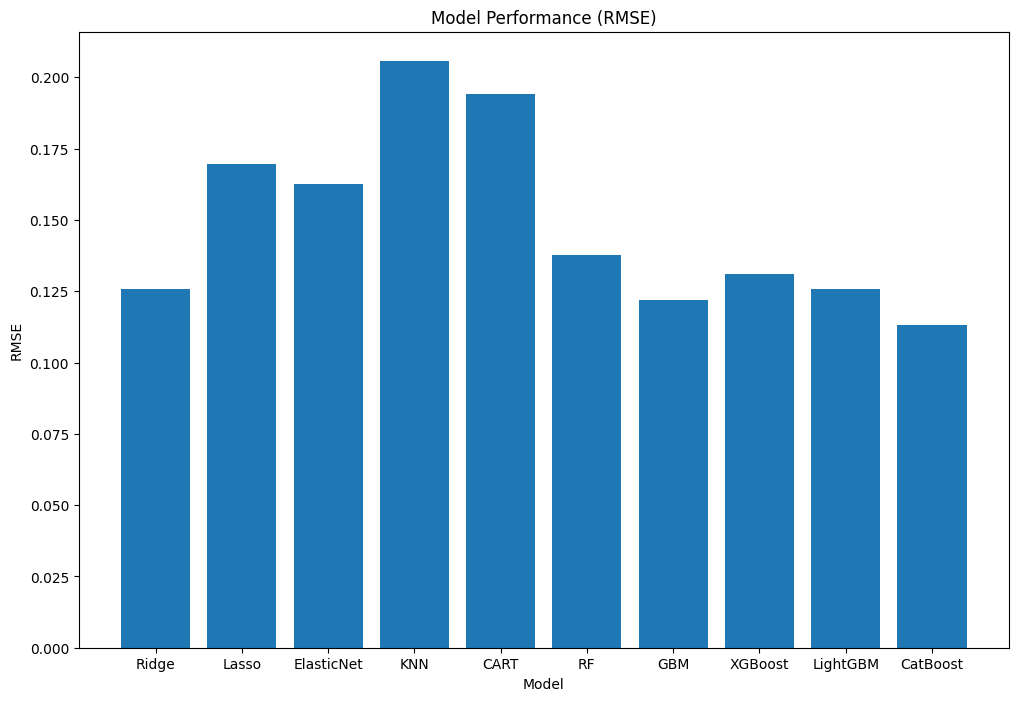

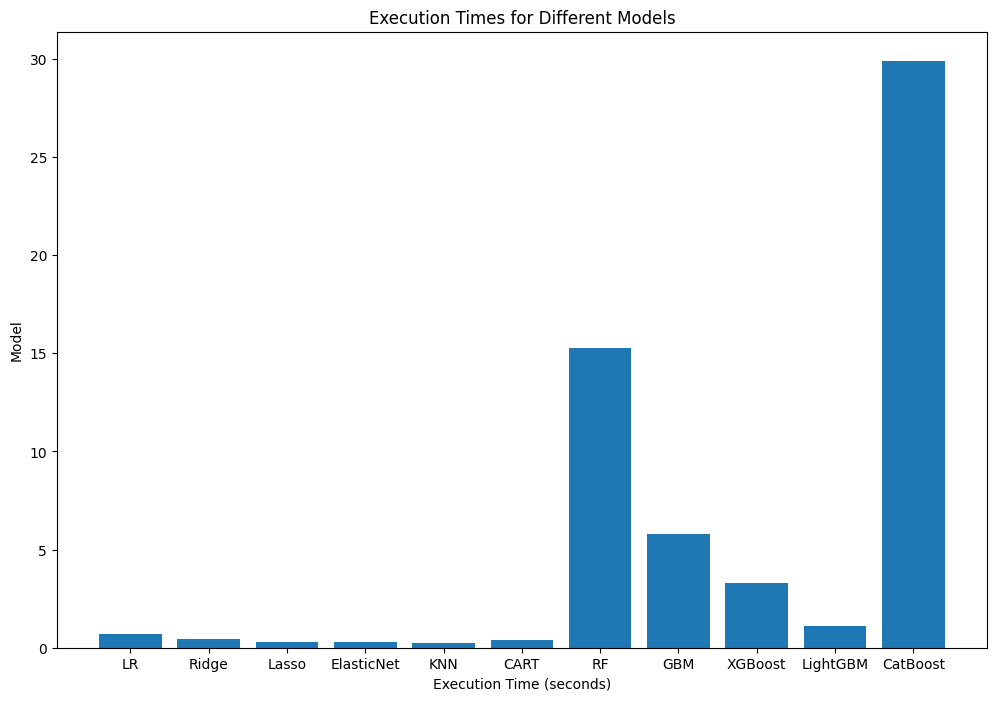

In [73]:
# Split the data into training and test sets
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=17)

# Define the models
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
execution_times = []

# Train and evaluate the models
for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot RMSE scores
plt.figure(figsize=(12, 8))
# Exclude LR from the plot
filtered_scores = [score for name, score in zip([name for name, _ in models], rmse_scores) if name != 'LR']
filtered_names = [name for name in [name for name, _ in models] if name != 'LR']
plt.bar(filtered_names, filtered_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot execution times
plt.figure(figsize=(12, 8))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

In [74]:
# Make predictions on the test set
y_pred_test = regressor.predict(X_test)

# Inverse log transformation to get predictions in the original scale
y_pred_test_original_scale = np.expm1(y_pred_test)
y_test_original_scale = np.expm1(y_test)

# Calculate RMSE in the original scale
rmse_original_scale = np.sqrt(np.mean((y_pred_test_original_scale - y_test_original_scale) ** 2))

print(f"RMSE in original scale: {round(rmse_original_scale, 4)}")

RMSE in original scale: 19009.9264


In [75]:
# Final Prediction Model
best_model_index = np.argmin(rmse_scores)  # en düşük RMSE skoru
best_model_name, best_model = models[best_model_index]

final_model = best_model

# Make predictions on the test set using the final model
y_final_pred = final_model.predict(X_test)
final_y_pred = np.expm1(y_final_pred)
final_y_test = np.expm1(y_test)

In [76]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
results['Difference'] = results['True Price'] - results['Predicted Price']

# Display the results
print(results)

      Predicted Price  True Price  Difference
703        154922.760  140000.000  -14922.760
1361       247625.153  260000.000   12374.847
937        232188.476  253000.000   20811.524
1330       254213.904  227000.000  -27213.904
113        196878.411  217000.000   20121.589
...               ...         ...         ...
903        242062.315  240000.000   -2062.315
682        187099.659  173000.000  -14099.659
1052       175606.005  165000.000  -10606.005
1159       187588.296  185000.000   -2588.296
672        171914.714  165000.000   -6914.714

[292 rows x 3 columns]


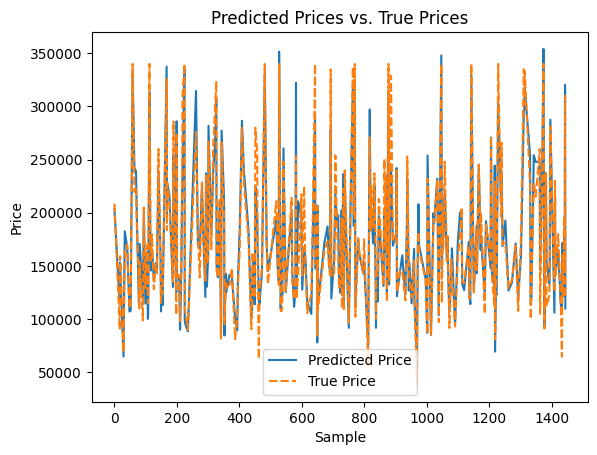

In [77]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Create a line plot
sns.lineplot(data=results)

# Label the axes
plt.xlabel('Sample')
plt.ylabel('Price')

# Set the title
plt.title('Predicted Prices vs. True Prices')

# Show the plot
plt.show()

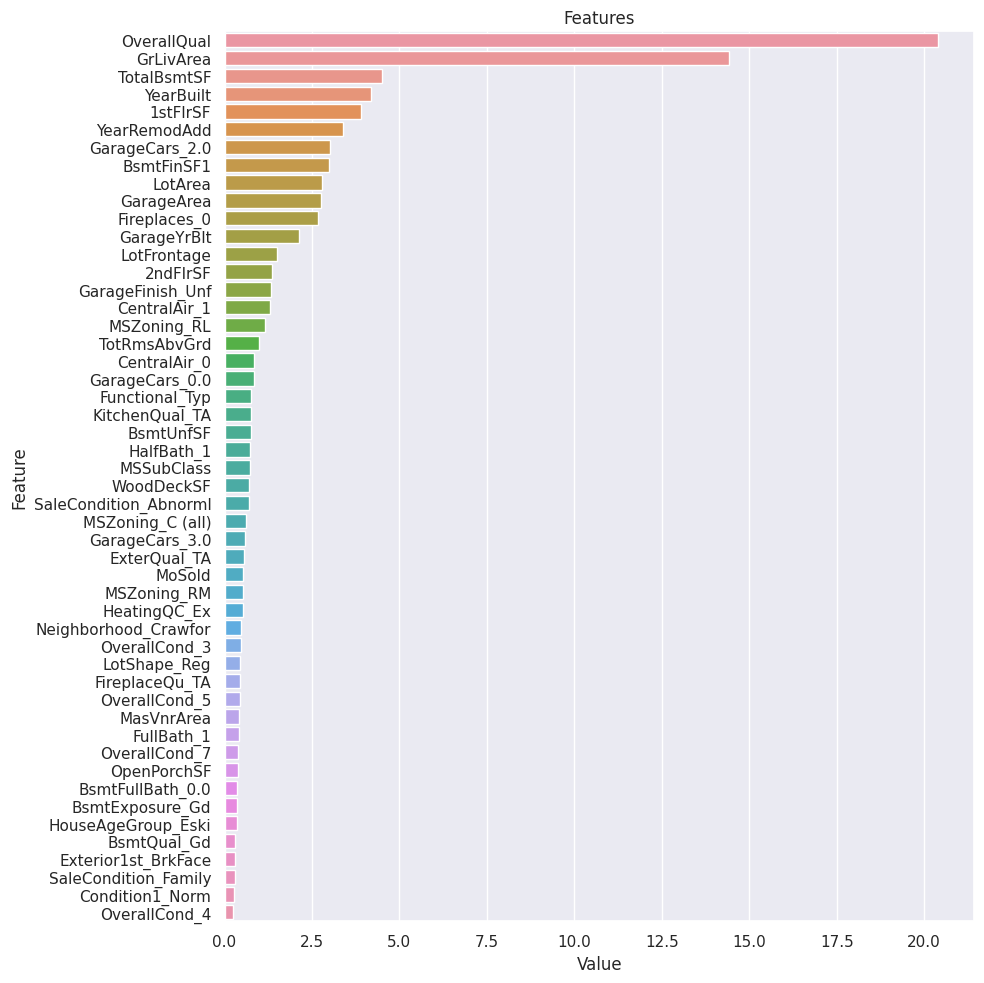

In [78]:
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(final_model, X)

In [79]:
import joblib
joblib.dump(best_model, "best_catboost_model.pkl")

['best_catboost_model.pkl']

In [80]:
loaded_model = joblib.load("best_catboost_model.pkl")

In [81]:
# Test verisini hazırlama
X_test = test_df.drop(["Id"], axis=1)

# Model ile tahmin yapma
y_submission_pred = loaded_model.predict(X_test)

tahminler = np.expm1(y_submission_pred)

In [82]:
print(y_submission_pred)

[11.70765894 12.00320723 12.09972833 ... 12.04342832 11.65941949
 12.37736624]


In [83]:
print(tahminler)

[121497.71244543 163276.62114263 179822.0031751  ... 169977.68389697
 115775.80188488 237366.82963295]


In [84]:
# test_df içinde Id kolonu olduğunu varsayalım

# Gerekirse test_id'yi al
test_id = test_df["Id"]

# Tahminleri DataFrame'e çevir
results = pd.DataFrame({
    "Id": test_id,
    "SalePrice": tahminler
})

# Ön izleme
print(results.head())

# CSV'ye kaydet
results.to_csv("submission10.csv", index=False)


        Id  SalePrice
1460  1461 121497.712
1461  1462 163276.621
1462  1463 179822.003
1463  1464 192541.779
1464  1465 179591.999
